# Creación del dataset dsualmh

Antes de nada necesitamos cargar las librerías pandas, matplotlib,networkx y el paquete nilmtk.

Asimismo realizaremos algunos otros ajustes.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import rcParams
from nilmtk.utils import print_dict
from nilmtk import DataSet
import warnings
warnings. filterwarnings("ignore")
plt.style.use('bmh')

## Creación del fichero en formato  HDFS5 a partir de las medidas y los metadatos 

La primera tarea es la conversion de los diferentes ficheros de medidas en formato csv al formato HDFS5  (o simplificando H5), que almacenaramos en la carpeta `./data`. Además en el archivo h5, que va contener los datos recopilados,  tambien tendremos todos  los metadatos del dataset.

El timestamp arrojado por el oZM esta en  en formato 13 digitos (es decir almacena hasta los milisegundos pasados desde el 1 del 1 de 1970).El Timestamp en "timezone" para Almeria es "Europe/Madrid" https://www.epochconverter.com/

El resto de metadatos tienen que ver con la potencia (real,reactiva y aparente), el voltaje, la intensidad,la frecuencia y el factor de potencia.

Para cada fichero csv, que numeraremos del 1 al 7 corresponditntes a cada medidor (siendo el nº 1 el principal),en la clase convert_ualm,  seguimos los siguintes pasos:

- Lectura del fichero numeado

- Conversión a formato fecha del campo timestamp

- Carga del resto de columnas

- Sort index

- Resample

- Reindexacion del fichero

Obviamente la clase  lanza este proceso para todos los ficheros de datos localizados en la carpeta de entrada \electricity\  usando  el fichero labels.csv

El contenido del fichero labels.csv es el siguinte:

- 1 mains

- 2 boiler

- 3 fan

- 4 freezer

- 5 television

- 6 vacuum cleaner



Por ultimo, asociamos los metadatos correspondientes ,leyendo los ficheros de la ruta C:\Users\XXXXX\anaconda3\envs\nilmtk-env\Lib\site-packages\nilmtk\dataset_converters\ualm\metadata. 


Los ficheros que usaremos como metadatos para incorporarlos al fichero H5 son los siguintes:

 - builiding1.yaml
 
 - dataset.yaml
 
 - meter_devices.yaml



In [3]:
from nilmtk.dataset_converters import convert_ualmt
convert_ualmt('./data/ozm1/', 'dsualmh.h5','2023-03-07','2023-03-07')


output_filename dsualmh.h5 format HDF
Path ualmt: ./data/ozm1/electricity

***********************************************************************************************
..Loading file    1 .csv
Filename  ./data/ozm1/electricity\1.csv
..Reading file csv
          timestamp        W      VAR         VA        f      VLN        PF  \
0      1.678184e+12  22.0991 -7.54384  23.351248  49.9944  247.147  0.629637   
1      1.678184e+12  22.4985 -7.95450  23.863322  49.9942  247.202  0.632288   
2      1.678184e+12  23.6133 -8.05194  24.948382  49.9942  247.190  0.624243   
3      1.678184e+12  22.9160 -7.90510  24.241202  49.9940  247.137  0.623314   
4      1.678184e+12  25.2503 -7.85989  26.445364  49.9940  247.172  0.574146   
...             ...      ...      ...        ...      ...      ...       ...   
36489  1.678191e+12  17.2421 -6.49109  18.423425  49.9896  248.690  0.553813   
36490  1.678191e+12  18.2619 -6.86620  19.510054  49.9896  248.716  0.554462   
36491  1.678191e+12  17.6

physical_quantity                     power                      frequency  \
type                                 active reactive   apparent              
2023-03-07 11:10:38.073000+01:00  22.099100 -7.54384  23.351248  49.994400   
2023-03-07 11:10:38.273000+01:00  22.498501 -7.95450  23.863321  49.994202   
2023-03-07 11:10:38.473000+01:00  23.613300 -8.05194  24.948381  49.994202   
2023-03-07 11:10:38.673000+01:00  22.916000 -7.90510  24.241201  49.993999   
2023-03-07 11:10:38.873000+01:00  25.250299 -7.85989  26.445364  49.993999   
...                                     ...      ...        ...        ...   
2023-03-07 13:12:14.591000+01:00  17.242100 -6.49109  18.423426  49.989601   
2023-03-07 13:12:14.791000+01:00  18.261900 -6.86620  19.510054  49.989601   
2023-03-07 13:12:14.991000+01:00  17.672800 -6.27814  18.754765  49.989399   
2023-03-07 13:12:15.191000+01:00  17.713699 -6.64853  18.920321  49.989399   
2023-03-07 13:12:15.391000+01:00  17.448099 -6.69050  18.686859 

File  1  loaded ok
***********************************************************************************************


***********************************************************************************************
..Loading file    2 .csv
Filename  ./data/ozm1/electricity\2.csv
..Reading file csv
          timestamp        W       VAR        VA        f      VLN        PF  \
0      1.678184e+12  9.12492 -2.095970  9.362543  49.9948  248.333  0.787681   
1      1.678184e+12  8.82567 -1.826750  9.012738  49.9944  248.379  0.762569   
2      1.678184e+12  8.01402 -1.929480  8.243020  49.9944  248.344  0.682069   
3      1.678184e+12  8.23003 -2.050490  8.481622  49.9942  248.319  0.690446   
4      1.678184e+12  8.84426 -0.456998  8.856055  49.9942  248.335  0.506523   
...             ...      ...       ...       ...      ...      ...       ...   
36489  1.678191e+12  9.01243 -2.208270  9.279032  49.9806  250.000  0.798907   
36490  1.678191e+12  8.36301 -1.880470  8.571823  49.9806  250.

.......Sorting index
physical_quantity                   power                      frequency  \
type                               active  reactive  apparent              
2023-03-07 11:10:38.046000+01:00  9.12492 -2.095970  9.362543  49.994801   
2023-03-07 11:10:38.246000+01:00  8.82567 -1.826750  9.012737  49.994400   
2023-03-07 11:10:38.446000+01:00  8.01402 -1.929480  8.243020  49.994400   
2023-03-07 11:10:38.646000+01:00  8.23003 -2.050490  8.481622  49.994202   
2023-03-07 11:10:38.846000+01:00  8.84426 -0.456998  8.856054  49.994202   
...                                   ...       ...       ...        ...   
2023-03-07 13:12:14.589000+01:00  9.01243 -2.208270  9.279032  49.980598   
2023-03-07 13:12:14.789000+01:00  8.36301 -1.880470  8.571823  49.980598   
2023-03-07 13:12:14.989000+01:00  8.97219 -1.636350  9.120191  49.980400   
2023-03-07 13:12:15.189000+01:00  7.56718 -1.881630  7.797612  49.980202   
2023-03-07 13:12:15.389000+01:00  8.24864 -1.504850  8.384790  49.9

[7298 rows x 157 columns]
File  2  loaded ok
***********************************************************************************************


***********************************************************************************************
..Loading file    3 .csv
Filename  ./data/ozm1/electricity\3.csv
..Reading file csv
          timestamp        W      VAR        VA        f      VLN        PF  \
0      1.678184e+12  7.77726 -2.03294  8.038565  49.9948  248.333  0.728679   
1      1.678184e+12  7.70183 -1.75382  7.898993  49.9944  248.379  0.714461   
2      1.678184e+12  7.45304 -2.40799  7.832385  49.9944  248.344  0.673459   
3      1.678184e+12  7.01096 -2.20655  7.349992  49.9942  248.319  0.694641   
4      1.678184e+12  7.30841 -6.39624  9.712092  49.9942  248.335  0.162790   
...             ...      ...      ...       ...      ...      ...       ...   
36489  1.678191e+12  7.04768 -2.02072  7.331648  49.9806  250.000  0.336979   
36490  1.678191e+12  7.72739 -2.02618  7.9886

.......Sorting index
physical_quantity                   power                     frequency  \
type                               active reactive  apparent              
2023-03-07 11:10:38.046000+01:00  7.77726 -2.03294  8.038565  49.994801   
2023-03-07 11:10:38.246000+01:00  7.70183 -1.75382  7.898993  49.994400   
2023-03-07 11:10:38.446000+01:00  7.45304 -2.40799  7.832385  49.994400   
2023-03-07 11:10:38.646000+01:00  7.01096 -2.20655  7.349992  49.994202   
2023-03-07 11:10:38.846000+01:00  7.30841 -6.39624  9.712092  49.994202   
...                                   ...      ...       ...        ...   
2023-03-07 13:12:14.589000+01:00  7.04768 -2.02072  7.331647  49.980598   
2023-03-07 13:12:14.789000+01:00  7.72739 -2.02618  7.988611  49.980598   
2023-03-07 13:12:14.989000+01:00  7.30216 -1.95391  7.559053  49.980400   
2023-03-07 13:12:15.189000+01:00  7.46509 -2.45077  7.857086  49.980202   
2023-03-07 13:12:15.389000+01:00  7.72034 -2.42687  8.092795  49.980202   

phy

File  3  loaded ok
***********************************************************************************************


***********************************************************************************************
..Loading file    4 .csv
Filename  ./data/ozm1/electricity\4.csv
..Reading file csv
          timestamp        W      VAR        VA        f      VLN        PF  \
0      1.678184e+12  3.04758 -1.67218  3.476191  49.9944  247.147  0.521644   
1      1.678184e+12  3.67423 -1.56021  3.991771  49.9942  247.202  0.542295   
2      1.678184e+12  3.28805 -1.85104  3.773276  49.9942  247.190  0.532526   
3      1.678184e+12  3.12649 -1.73031  3.573362  49.9940  247.137  0.480678   
4      1.678184e+12  3.83996 -2.00342  4.331167  49.9940  247.172  0.592902   
...             ...      ...      ...       ...      ...      ...       ...   
36489  1.678191e+12  3.70550 -1.76192  4.103058  49.9896  248.690  0.555304   
36490  1.678191e+12  3.67628 -2.30640  4.339868  49.9896  248.716  0.55

.......Sorting index
physical_quantity                   power                     frequency  \
type                               active reactive  apparent              
2023-03-07 11:10:38.073000+01:00  3.04758 -1.67218  3.476191  49.994400   
2023-03-07 11:10:38.273000+01:00  3.67423 -1.56021  3.991771  49.994202   
2023-03-07 11:10:38.473000+01:00  3.28805 -1.85104  3.773276  49.994202   
2023-03-07 11:10:38.674000+01:00  3.12649 -1.73031  3.573362  49.993999   
2023-03-07 11:10:38.873000+01:00  3.83996 -2.00342  4.331167  49.993999   
...                                   ...      ...       ...        ...   
2023-03-07 13:12:14.591000+01:00  3.70550 -1.76192  4.103058  49.989601   
2023-03-07 13:12:14.791000+01:00  3.67628 -2.30640  4.339868  49.989601   
2023-03-07 13:12:14.991000+01:00  3.43264 -2.05542  4.000969  49.989399   
2023-03-07 13:12:15.191000+01:00  3.53651 -2.29790  4.217496  49.989399   
2023-03-07 13:12:15.391000+01:00  3.67424 -2.56106  4.478739  49.988998   

phy

File  4  loaded ok
***********************************************************************************************


***********************************************************************************************
..Loading file    5 .csv
Filename  ./data/ozm1/electricity\5.csv
..Reading file csv
          timestamp        W       VAR        VA        f      VLN        PF  \
0      1.678184e+12  9.32537 -2.464010  9.645407  49.9948  248.333  0.790670   
1      1.678184e+12  9.53717 -2.514080  9.862971  49.9944  248.379  0.788887   
2      1.678184e+12  9.33392 -2.788730  9.741613  49.9944  248.344  0.666008   
3      1.678184e+12  9.58691 -2.651410  9.946798  49.9942  248.319  0.624579   
4      1.678184e+12  8.50235 -0.585586  8.522494  49.9942  248.335  0.415885   
...             ...      ...       ...       ...      ...      ...       ...   
36489  1.678191e+12  8.39523 -1.798760  8.585764  49.9806  250.000  0.809962   
36490  1.678191e+12  8.60050 -1.909200  8.809858  49.9806  250.

physical_quantity                   power                      frequency  \
type                               active  reactive  apparent              
2023-03-07 11:10:38.046000+01:00  9.32537 -2.464010  9.645407  49.994801   
2023-03-07 11:10:38.246000+01:00  9.53717 -2.514080  9.862971  49.994400   
2023-03-07 11:10:38.446000+01:00  9.33392 -2.788730  9.741613  49.994400   
2023-03-07 11:10:38.646000+01:00  9.58691 -2.651410  9.946798  49.994202   
2023-03-07 11:10:38.846000+01:00  8.50235 -0.585586  8.522493  49.994202   
...                                   ...       ...       ...        ...   
2023-03-07 13:12:14.589000+01:00  8.39523 -1.798760  8.585764  49.980598   
2023-03-07 13:12:14.789000+01:00  8.60050 -1.909200  8.809858  49.980598   
2023-03-07 13:12:14.989000+01:00  8.59398 -2.029950  8.830473  49.980400   
2023-03-07 13:12:15.189000+01:00  8.55765 -1.946210  8.776164  49.980202   
2023-03-07 13:12:15.389000+01:00  8.91435 -1.911240  9.116929  49.980202   

physical_qu

File  5  loaded ok
***********************************************************************************************


***********************************************************************************************
..Loading file    6 .csv
Filename  ./data/ozm1/electricity\6.csv
..Reading file csv
          timestamp        W       VAR         VA        f      VLN        PF  \
0      1.678184e+12  7.61768 -1.124520   7.700237  49.9948  248.333  0.722310   
1      1.678184e+12  7.05141 -0.909240   7.109787  49.9944  248.379  0.709923   
2      1.678184e+12  6.82124 -1.330110   6.949708  49.9944  248.344  0.657028   
3      1.678184e+12  7.16882 -1.005770   7.239034  49.9942  248.319  0.579907   
4      1.678184e+12  9.43979 -4.054070  10.273516  49.9942  248.335  0.276131   
...             ...      ...       ...        ...      ...      ...       ...   
36489  1.678191e+12  6.66328 -1.410960   6.811032  49.9806  250.000  0.783094   
36490  1.678191e+12  6.21335 -0.704507   6.253158  49.9

.......Sorting index
physical_quantity                   power                       frequency  \
type                               active  reactive   apparent              
2023-03-07 11:10:38.046000+01:00  7.61768 -1.124520   7.700237  49.994801   
2023-03-07 11:10:38.246000+01:00  7.05141 -0.909240   7.109787  49.994400   
2023-03-07 11:10:38.446000+01:00  6.82124 -1.330110   6.949708  49.994400   
2023-03-07 11:10:38.646000+01:00  7.16882 -1.005770   7.239034  49.994202   
2023-03-07 11:10:38.846000+01:00  9.43979 -4.054070  10.273517  49.994202   
...                                   ...       ...        ...        ...   
2023-03-07 13:12:14.589000+01:00  6.66328 -1.410960   6.811031  49.980598   
2023-03-07 13:12:14.789000+01:00  6.21335 -0.704507   6.253158  49.980598   
2023-03-07 13:12:14.989000+01:00  6.24256 -1.601110   6.444622  49.980400   
2023-03-07 13:12:15.189000+01:00  6.19570 -1.094290   6.291590  49.980202   
2023-03-07 13:12:15.389000+01:00  6.96085 -1.670060   7

File  6  loaded ok
***********************************************************************************************


***********************************************************************************************
..Loading file    7 .csv
Filename  ./data/ozm1/electricity\7.csv
..Reading file csv
          timestamp        W      VAR         VA        f      VLN        PF  \
0      1.678184e+12  9.32428 -3.57755   9.987043  49.9944  247.147  0.846303   
1      1.678184e+12  9.60855 -3.36797  10.181716  49.9942  247.202  0.850885   
2      1.678184e+12  9.60251 -2.89566  10.029607  49.9942  247.190  0.874312   
3      1.678184e+12  9.58635 -3.31436  10.143132  49.9940  247.137  0.845298   
4      1.678184e+12  9.67112 -3.20925  10.189693  49.9940  247.172  0.857572   
...             ...      ...      ...        ...      ...      ...       ...   
36489  1.678191e+12  8.76652 -3.21898   9.338827  49.9896  248.690  0.814606   
36490  1.678191e+12  8.98431 -3.46359   9.628826  49.9896  248.

physical_quantity                   power                      frequency  \
type                               active reactive   apparent              
2023-03-07 11:10:38.073000+01:00  9.32428 -3.57755   9.987042  49.994400   
2023-03-07 11:10:38.273000+01:00  9.60855 -3.36797  10.181716  49.994202   
2023-03-07 11:10:38.473000+01:00  9.60251 -2.89566  10.029607  49.994202   
2023-03-07 11:10:38.673000+01:00  9.58635 -3.31436  10.143131  49.993999   
2023-03-07 11:10:38.873000+01:00  9.67112 -3.20925  10.189692  49.993999   
...                                   ...      ...        ...        ...   
2023-03-07 13:12:14.591000+01:00  8.76652 -3.21898   9.338827  49.989601   
2023-03-07 13:12:14.791000+01:00  8.98431 -3.46359   9.628826  49.989601   
2023-03-07 13:12:14.991000+01:00  8.35283 -3.31199   8.985494  49.989399   
2023-03-07 13:12:15.191000+01:00  8.53205 -3.70186   9.300514  49.989399   
2023-03-07 13:12:15.391000+01:00  8.76016 -3.49872   9.433000  49.988998   

physical_qu

..Reading file csv
          timestamp        W      VAR         VA        f      VLN        PF  \
0      1.678184e+12  9.49962 -2.54506   9.834642  50.0430  246.757  0.878536   
1      1.678184e+12  9.66515 -2.88804  10.087409  50.0425  246.684  0.875040   
2      1.678184e+12  9.02983 -2.78650   9.449997  50.0419  245.835  0.861048   
3      1.678184e+12  9.26818 -2.23573   9.534026  50.0419  247.098  0.619148   
4      1.678184e+12  9.03674 -2.18946   9.298193  50.0421  246.592  0.766949   
...             ...      ...      ...        ...      ...      ...       ...   
36472  1.678191e+12  8.27656 -2.60421   8.676596  50.0204  248.214  0.820909   
36473  1.678191e+12  8.68970 -2.51686   9.046854  50.0202  247.545  0.856448   
36474  1.678191e+12  9.16284 -2.39700   9.471177  50.0238  248.542  0.869879   
36475  1.678191e+12  9.38272 -2.81346   9.795460  50.0252  248.305  0.728918   
36476  1.678191e+12  8.48807 -2.94635   8.984898  50.0244  247.884  0.812794   

              A     

.......Sorting index
physical_quantity                   power                      frequency  \
type                               active reactive   apparent              
2023-03-07 11:10:38.160000+01:00  9.49962 -2.54506   9.834642  50.042999   
2023-03-07 11:10:38.359000+01:00  9.66515 -2.88804  10.087409  50.042500   
2023-03-07 11:10:38.559000+01:00  9.02983 -2.78650   9.449997  50.041901   
2023-03-07 11:10:38.760000+01:00  9.26818 -2.23573   9.534025  50.041901   
2023-03-07 11:10:38.959000+01:00  9.03674 -2.18946   9.298193  50.042099   
...                                   ...      ...        ...        ...   
2023-03-07 13:12:14.659000+01:00  8.27656 -2.60421   8.676597  50.020401   
2023-03-07 13:12:14.860000+01:00  8.68970 -2.51686   9.046854  50.020199   
2023-03-07 13:12:15.060000+01:00  9.16284 -2.39700   9.471177  50.023800   
2023-03-07 13:12:15.260000+01:00  9.38272 -2.81346   9.795460  50.025200   
2023-03-07 13:12:15.460000+01:00  8.48807 -2.94635   8.984898  50.0

physical_quantity             power                       frequency  \
type                         active  reactive   apparent              
2023-03-07 11:10:38+01:00  9.299904 -2.528958   9.640853  50.042278   
2023-03-07 11:10:39+01:00  9.570068 -2.676130   9.939991  50.041981   
2023-03-07 11:10:40+01:00  9.518566 -2.865250   9.942685  50.042622   
2023-03-07 11:10:41+01:00  9.627158 -2.531298   9.966635  50.043560   
2023-03-07 11:10:42+01:00  9.626934 -2.797586  10.033474  50.043758   
...                             ...       ...        ...        ...   
2023-03-07 13:12:11+01:00  8.833302 -2.696646   9.236321  50.023521   
2023-03-07 13:12:12+01:00  8.848138 -2.822792   9.288075  50.024319   
2023-03-07 13:12:13+01:00  8.884596 -2.741824   9.300225  50.024281   
2023-03-07 13:12:14+01:00  8.952826 -2.653596   9.341162  50.020782   
2023-03-07 13:12:15+01:00  9.011209 -2.718937   9.417178  50.024467   

physical_quantity             voltage        pf   current     voltage  \
typ

Conversion of timestamp
                                        W      VAR        VA        f  \
2023-03-07 11:10:38.160000+01:00  8.27919 -3.32329  8.921284  50.0430   
2023-03-07 11:10:38.359000+01:00  8.82715 -4.21068  9.780004  50.0425   
2023-03-07 11:10:38.559000+01:00  8.13951 -3.45906  8.844019  50.0419   
2023-03-07 11:10:38.760000+01:00  8.22832 -3.80827  9.066871  50.0419   
2023-03-07 11:10:38.959000+01:00  7.86661 -3.01599  8.424946  50.0421   
...                                   ...      ...       ...      ...   
2023-03-07 13:12:14.659000+01:00  8.01664 -3.22857  8.642352  50.0204   
2023-03-07 13:12:14.859000+01:00  8.18725 -3.05498  8.738644  50.0202   
2023-03-07 13:12:15.060000+01:00  8.33964 -3.30322  8.970001  50.0238   
2023-03-07 13:12:15.260000+01:00  7.88351 -3.29144  8.543029  50.0252   
2023-03-07 13:12:15.460000+01:00  7.71389 -3.21511  8.357090  50.0244   

                                      VLN        PF         A         VH1  \
2023-03-07 11:10:38.16

.......Sorting index
physical_quantity                   power                     frequency  \
type                               active reactive  apparent              
2023-03-07 11:10:38.160000+01:00  8.27919 -3.32329  8.921285  50.042999   
2023-03-07 11:10:38.359000+01:00  8.82715 -4.21068  9.780005  50.042500   
2023-03-07 11:10:38.559000+01:00  8.13951 -3.45906  8.844019  50.041901   
2023-03-07 11:10:38.760000+01:00  8.22832 -3.80827  9.066871  50.041901   
2023-03-07 11:10:38.959000+01:00  7.86661 -3.01599  8.424947  50.042099   
...                                   ...      ...       ...        ...   
2023-03-07 13:12:14.659000+01:00  8.01664 -3.22857  8.642352  50.020401   
2023-03-07 13:12:14.859000+01:00  8.18725 -3.05498  8.738645  50.020199   
2023-03-07 13:12:15.060000+01:00  8.33964 -3.30322  8.970000  50.023800   
2023-03-07 13:12:15.260000+01:00  7.88351 -3.29144  8.543030  50.025200   
2023-03-07 13:12:15.460000+01:00  7.71389 -3.21511  8.357090  50.024399   

phy

File  9  loaded ok
***********************************************************************************************


***********************************************************************************************
..Loading file    10 .csv
Filename  ./data/ozm1/electricity\10.csv
..Reading file csv
          timestamp        W      VAR         VA        f      VLN        PF  \
0      1.678184e+12  9.70459 -1.70343   9.852954  50.0430  246.757  0.861677   
1      1.678184e+12  9.40654 -2.08848   9.635596  50.0425  246.684  0.896402   
2      1.678184e+12  9.59462 -2.17803   9.838727  50.0419  245.835  0.889576   
3      1.678184e+12  9.88155 -2.06080  10.094149  50.0419  247.098  0.902259   
4      1.678184e+12  9.85785 -1.77212  10.015867  50.0421  246.592  0.885948   
...             ...      ...      ...        ...      ...      ...       ...   
36472  1.678191e+12  8.81806 -2.71574   9.226775  50.0204  248.214  0.859171   
36473  1.678191e+12  9.44776 -2.21975   9.705022  50.0202  24

.......Sorting index
physical_quantity                   power                      frequency  \
type                               active reactive   apparent              
2023-03-07 11:10:38.160000+01:00  9.70459 -1.70343   9.852954  50.042999   
2023-03-07 11:10:38.359000+01:00  9.40654 -2.08848   9.635596  50.042500   
2023-03-07 11:10:38.559000+01:00  9.59462 -2.17803   9.838727  50.041901   
2023-03-07 11:10:38.760000+01:00  9.88155 -2.06080  10.094149  50.041901   
2023-03-07 11:10:38.959000+01:00  9.85785 -1.77212  10.015867  50.042099   
...                                   ...      ...        ...        ...   
2023-03-07 13:12:14.659000+01:00  8.81806 -2.71574   9.226775  50.020401   
2023-03-07 13:12:14.859000+01:00  9.44776 -2.21975   9.705022  50.020199   
2023-03-07 13:12:15.060000+01:00  9.89497 -2.24108  10.145580  50.023800   
2023-03-07 13:12:15.259000+01:00  9.32844 -2.12798   9.568078  50.025200   
2023-03-07 13:12:15.460000+01:00  9.66039 -2.39097   9.951878  50.0

..Reading file csv
          timestamp        W      VAR        VA        f      VLN        PF  \
0      1.678184e+12  8.48107 -2.37765  8.808050  50.0430  246.757  0.810394   
1      1.678184e+12  8.55211 -2.70065  8.968393  50.0425  246.684  0.744958   
2      1.678184e+12  7.92745 -2.77020  8.397524  50.0419  245.835  0.840469   
3      1.678184e+12  8.64608 -2.98154  9.145724  50.0419  247.098  0.822757   
4      1.678184e+12  8.44640 -3.02546  8.971908  50.0421  246.592  0.706513   
...             ...      ...      ...       ...      ...      ...       ...   
36472  1.678191e+12  8.23880 -2.91033  8.737724  50.0204  248.214  0.833919   
36473  1.678191e+12  8.67808 -3.44992  9.338684  50.0202  247.545  0.720240   
36474  1.678191e+12  8.66752 -3.29412  9.272388  50.0238  248.542  0.829965   
36475  1.678191e+12  9.37141 -3.39220  9.966460  50.0252  248.305  0.843649   
36476  1.678191e+12  9.17099 -3.20873  9.716121  50.0244  247.884  0.850830   

              A         VH1     

[36477 rows x 157 columns]
.......Sorting index
physical_quantity                   power                     frequency  \
type                               active reactive  apparent              
2023-03-07 11:10:38.160000+01:00  8.48107 -2.37765  8.808050  50.042999   
2023-03-07 11:10:38.359000+01:00  8.55211 -2.70065  8.968392  50.042500   
2023-03-07 11:10:38.559000+01:00  7.92745 -2.77020  8.397524  50.041901   
2023-03-07 11:10:38.760000+01:00  8.64608 -2.98154  9.145723  50.041901   
2023-03-07 11:10:38.959000+01:00  8.44640 -3.02546  8.971908  50.042099   
...                                   ...      ...       ...        ...   
2023-03-07 13:12:14.659000+01:00  8.23880 -2.91033  8.737724  50.020401   
2023-03-07 13:12:14.859000+01:00  8.67808 -3.44992  9.338683  50.020199   
2023-03-07 13:12:15.060000+01:00  8.66752 -3.29412  9.272388  50.023800   
2023-03-07 13:12:15.260000+01:00  9.37141 -3.39220  9.966460  50.025200   
2023-03-07 13:12:15.460000+01:00  9.17099 -3.20873  

...........Reindexing file
physical_quantity             power                      frequency  \
type                         active  reactive  apparent              
2023-03-07 11:10:38+01:00  8.410622 -2.771100  8.858319  50.042278   
2023-03-07 11:10:39+01:00  8.503956 -2.796638  8.961302  50.041981   
2023-03-07 11:10:40+01:00  8.553123 -3.000540  9.064667  50.042622   
2023-03-07 11:10:41+01:00  9.384454 -2.510622  9.791112  50.043560   
2023-03-07 11:10:42+01:00  8.475520 -2.781702  8.922050  50.043758   
...                             ...       ...       ...        ...   
2023-03-07 13:12:11+01:00  8.646200 -3.104730  9.190468  50.023521   
2023-03-07 13:12:12+01:00  8.697444 -3.170596  9.259890  50.024319   
2023-03-07 13:12:13+01:00  8.678968 -2.925816  9.164179  50.024281   
2023-03-07 13:12:14+01:00  8.571296 -3.136296  9.129144  50.020782   
2023-03-07 13:12:15+01:00  9.069973 -3.298350  9.651656  50.024467   

physical_quantity             voltage        pf   current     

Convertidos los metadatos y los datos a HDFS5, la primera tarea es la importación del dataset que se encuentra en formato HDF5 en la carpeta `./data`. Para ello, se carga el archivo dsualmh.h5 que contiene los datos recopilados y metadatos del dataset.

In [95]:
#dataset de referencia 
dsualmh = DataSet('dsualmh.h5')


## MeterGroup y ElecMeter

Todos los conjuntos de datos de NILM constan de varios grupos de medidores de electricidad. 

Podemos agrupar los contadores por los siguintes criterios:
- Por viviendas en caso de haber mas viviendas por contador principal
- Por el tipo de aparato al que están conectados directamente
- Por frecuencia de muestreo
- O si el medidor es un "medidor de sitio" para toda la casa
- Si es un submedidor, a nivel de electrodomésticos, o incluso a nivel de circuito.

En NILMTK, una de las clases clave es MeterGroup, que almacena una lista de medidores y nos permite seleccionar un subconjunto de medidores, agregar energía de todos los medidores y muchas otras funciones.

Cuando abrimos por primera vez un DataSet, NILMTK crea varios objetosMeterGroup. Hay una clase llamada nilmtk.global_meter_group, la cual contiene todos los medidores cargados actualmente (incluso de varios conjuntos de datos si ha abierto más de un conjunto de datos). 

También hay un MeterGroup por edificio (que vive en el atributoBuilding.elec). También podemos anidar "MeterGroups" para agregar redes de fase dividida, red trifásica y aparatos de suministro dual (240 voltios) en conjuntos de datos de América del Norte y Canadá. 

En este punto, todos los metadatos se han cargado en la memoria pero ninguno de los datos de energía se ha cargado.
Cada edificio tiene un atributo "elec" que es un objeto "MeterGroup"y  que contiene los medidores "ElecMeter".

In [96]:
elec = dsualmh.buildings[1].elec #todos los medidores del dataset
elec

MeterGroup(meters=
  ElecMeter(instance=1, building=1, dataset='dsualmh', site_meter, appliances=[])
  ElecMeter(instance=2, building=1, dataset='dsualmh', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=3, building=1, dataset='dsualmh', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=4, building=1, dataset='dsualmh', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=5, building=1, dataset='dsualmh', appliances=[Appliance(type='kettle', instance=1)])
  ElecMeter(instance=6, building=1, dataset='dsualmh', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=7, building=1, dataset='dsualmh', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=8, building=1, dataset='dsualmh', appliances=[Appliance(type='electric shower heater', instance=1)])
  ElecMeter(instance=9, building=1, dataset='dsualmh', appliances=[Appliance(type='fan', instance=1)]

Tenga en cuenta que podria haber grupos de medidores anidados: por ejemplo para un horno électrico y otro para la lavadora secadora (ambos son electrodomésticos de 240 voltios podrian tener dos medidores por electrodoméstico):

In [97]:
elec.nested_metergroups()

[]

Poner estos medidores en un grupo de medidores nos permite sumar fácilmente la demanda de energía registrada por ambos medidores para obtener la demanda de energía total para todo el aparato (pero también es muy fácil ver la demanda de energía del medidor individual).

Podemos obtener fácilmente un grupo de medidores(MeterGroup) de los submedidores o de la red.

In [98]:
elec.mains()

ElecMeter(instance=1, building=1, dataset='dsualmh', site_meter, appliances=[])

Podemos obtener fácilmente la suma de los datos de potencia de ambos medidores de red:

In [99]:
elec.mains().power_series_all_data().head()

2023-03-07 11:10:38+01:00    23.27544
2023-03-07 11:10:39+01:00    22.11520
2023-03-07 11:10:40+01:00    21.88566
2023-03-07 11:10:41+01:00    21.48184
2023-03-07 11:10:42+01:00    21.43676
Name: (power, active), dtype: float32

Obtenemos los submedidores asociados al medidor principal

In [100]:
elec.submeters()

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='dsualmh', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=3, building=1, dataset='dsualmh', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=4, building=1, dataset='dsualmh', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=5, building=1, dataset='dsualmh', appliances=[Appliance(type='kettle', instance=1)])
  ElecMeter(instance=6, building=1, dataset='dsualmh', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=7, building=1, dataset='dsualmh', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=8, building=1, dataset='dsualmh', appliances=[Appliance(type='electric shower heater', instance=1)])
  ElecMeter(instance=9, building=1, dataset='dsualmh', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=10, building=1, dataset='dsualmh', appliances=[Appliance(ty

### Etiquetas de dispositivos

Tenenos 11 medidores, por lo que podemos asociarle una etiqueta para identificarlos biunivocamente. 

In [101]:
labels = pd.DataFrame({'Instances': list(range(1,12)),
                       'Meters': ['Main', 'Electric furnace', 'Microwave','Television','Kettle','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer']})

Meters={}
for x in range(len(labels)): Meters[elec[x+1]]=labels['Meters'][x]
    

    

    

##  Metadatos

Mediante el metodo print_dict podemos explorar los metadatos asociados al Dataset

In [102]:
print_dict(dsualmh.metadata)  #metadatos del dataset

Asimismo podemos explorando los metadatos asociados al edificio

In [103]:
print_dict(dsualmh.buildings[1].metadata) #Información del edificio 1 (instancia 1)

Veamos los metadados asociados a los sinte  aparatos de medida

In [104]:
print_dict(elec[1].get_metadata()) #metadatos de ElecMeter 1 o elec[1]

print_dict(elec[2].get_metadata()) #metadatos de ElecMeter 2 o elec[2]

print_dict(elec[3].get_metadata()) #metadatos de ElecMeter 3 o elec[3]

print_dict(elec[4].get_metadata()) #metadatos de ElecMeter 4 o elec[4]

print_dict(elec[5].get_metadata()) #metadatos de ElecMeter 5 o elec[5]

print_dict(elec[6].get_metadata()) #metadatos de ElecMeter 6 o elec[6]
print_dict(elec[7].get_metadata()) #metadatos de ElecMeter 1 o elec[1]

print_dict(elec[8].get_metadata()) #metadatos de ElecMeter 2 o elec[2]

print_dict(elec[9].get_metadata()) #metadatos de ElecMeter 3 o elec[3]

print_dict(elec[10].get_metadata()) #metadatos de ElecMeter 4 o elec[4]

print_dict(elec[11].get_metadata()) #metadatos de ElecMeter 5 o elec[5]





# Estadísticas e información para medidores individuales

La clase 'ElecMeter' representa un solo medidor de electricidad. Cada ElecMeter tiene una lista de objetos de dispositivo asociados. Cada medidor puede estar asociado a uno o más electrodomésticos.ElecMeter tiene muchos de los mismos métodos de estadísticas que MeterGroup, como 'total_energy' , 'available_power_ac_types' , 'power_series', 'power_series_all_data'. 

Ahora exploraremos algunas funciones de estadísticas más (muchas de las cuales también están disponibles en MeterGroup) .

Vamos a  estudiar el medidor asociado al hervidor de agua:

In [105]:
boiler_meter = elec['kettle']

Obtener el  medidor principal  superior o "de aguas arriba" (upstream meter)

In [106]:
boiler_meter.upstream_meter() # happens to be the mains meter group!

ElecMeter(instance=1, building=1, dataset='dsualmh', site_meter, appliances=[])

Metadatos sobre la clase de medidor

In [107]:
boiler_meter.device

{'model': 'OZM',
 'manufacturer': 'ual',
 'manufacturer_url': 'https://openzmeter.com/',
 'description': 'Multifunction meter for feeders',
 'sample_period': 60,
 'max_sample_period': 300,
 'measurements': [{'physical_quantity': 'power',
   'type': 'active',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'power',
   'type': 'apparent',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'power',
   'type': 'reactive',
   'upper_limit': 10000,
   'lower_limit': 0},
  {'physical_quantity': 'frequency',
   'type': None,
   'upper_limit': 70,
   'lower_limit': 0},
  {'physical_quantity': 'voltage',
   'type': None,
   'upper_limit': 270,
   'lower_limit': 0},
  {'physical_quantity': 'pf',
   'type': None,
   'upper_limit': 1,
   'lower_limit': 0},
  {'physical_quantity': 'current',
   'type': None,
   'upper_limit': 100,
   'lower_limit': 0},
  {'physical_quantity': 'voltage',
   'type': 'armonic1',
   'upper_limit': 100,
   'lower_limit': 0},
  {

Aparato dominante:Si los metadatos especifican que un medidor tiene varios medidores conectados, entonces uno de ellos se puede especificar como el dispositivo 'dominante', y este dispositivo se puede recuperar con este método

In [108]:
boiler_meter.dominant_appliance()

Appliance(type='kettle', instance=1)

### Energia total

Algunos métodos estadísticos de MeterGroup permanecen en ElecMeter:

In [109]:
boiler_meter.total_energy() # kWh

apparent    0.514472
active      0.513943
reactive    0.001735
dtype: float64

Podemos optar por volcar todos los datos sobre el medidor de luminarias:

In [110]:
next(boiler_meter.load())

physical_quantity           current   voltage   current         power  \
type                      armonic16 armonic24 armonic21     armonic32   
2023-03-07 11:10:38+01:00  0.001943  0.009242  0.001269 -2.200000e-06   
2023-03-07 11:10:39+01:00  0.000879  0.008022  0.001382  5.400000e-06   
2023-03-07 11:10:40+01:00  0.000461  0.011829  0.000575  2.000000e-07   
2023-03-07 11:10:41+01:00  0.001146  0.005247  0.001099  4.600000e-06   
2023-03-07 11:10:42+01:00  0.001133  0.007290  0.001349  1.800000e-06   
...                             ...       ...       ...           ...   
2023-03-07 13:12:11+01:00  0.000990  0.008661  0.000744  1.400000e-06   
2023-03-07 13:12:12+01:00  0.000889  0.009500  0.000905  5.800000e-06   
2023-03-07 13:12:13+01:00  0.000959  0.010060  0.001268  8.200000e-06   
2023-03-07 13:12:14+01:00  0.001813  0.005292  0.001509  5.000000e-06   
2023-03-07 13:12:15+01:00  0.000451  0.007824  0.000354  5.000000e-06   

physical_quantity             voltage             current     power   voltage  \
type                         armonic1 armonic29 armonic45  armonic6 armonic25   
2023-03-07 11:10:38+01:00  248.282532  0.064071  0.000641 -0.000004  0.127533   
2023-03-07 11:10:39+01:00  248.330917  0.066415  0.001061 -0.000004  0.129051   
2023-03-07 11:10:40+01:00  248.236359  0.066281  0.000541 -0.000003  0.132923   
2023-03-07 11:10:41+01:00  248.324982  0.066492  0.000796  0.000017  0.128160   
2023-03-07 11:10:42+01:00  248.270370  0.058975  0.000786 -0.000012  0.134971   
...                               ...       ...       ...       ...       ...   
2023-03-07 13:12:11+01:00  249.861893  0.022980  0.000756  0.000153  0.054120   
2023-03-07 13:12:12+01:00  249.917007  0.019711  0.000635  0.000114  0.059299   
2023-03-07 13:12:13+01:00  249.732788  0.024480  0.000742  0.000049  0.031565   
2023-03-07 13:12:14+01:00  249.905319  0.034908  0.000603 -0.000515  0.041254   
2023-03-07 13:12:15+01:00  249.839172  0.030231  0.000270  0.000058  0.041038   

physical_quantity                 power  ...   voltage   current            \
type                          armonic14  ... armonic34  armonic6 armonic43   
2023-03-07 11:10:38+01:00  1.500000e-05  ...  0.009554  0.001741  0.001006   
2023-03-07 11:10:39+01:00  3.160000e-05  ...  0.009357  0.000704  0.000272   
2023-03-07 11:10:40+01:00  8.000001e-07  ...  0.007619  0.000846  0.000606   
2023-03-07 11:10:41+01:00  3.420000e-05  ...  0.005257  0.001179  0.000803   
2023-03-07 11:10:42+01:00 -1.440000e-05  ...  0.007547  0.000923  0.000756   
...                                 ...  ...       ...       ...       ...   
2023-03-07 13:12:11+01:00  2.600000e-06  ...  0.007682  0.001374  0.000263   
2023-03-07 13:12:12+01:00 -4.000000e-06  ...  0.008393  0.000918  0.000394   
2023-03-07 13:12:13+01:00 -1.800000e-06  ...  0.011032  0.001044  0.000770   
2023-03-07 13:12:14+01:00  8.000003e-07  ...  0.006901  0.005702  0.000897   
2023-03-07 13:12:15+01:00  1.050000e-05  ...  0.004011  0.000685  0.000328   

physical_quantity                 power   current   voltage   current  \
type                          armonic24 armonic24 armonic30 armonic35   
2023-03-07 11:10:38+01:00  9.999999e-07  0.001011  0.007612  0.001352   
2023-03-07 11:10:39+01:00  6.200000e-06  0.000914  0.009223  0.000825   
2023-03-07 11:10:40+01:00  6.000000e-06  0.000679  0.008359  0.000533   
2023-03-07 11:10:41+01:00 -6.000000e-07  0.001195  0.009432  0.000830   
2023-03-07 11:10:42+01:00  5.600000e-06  0.001058  0.006963  0.000807   
...                                 ...       ...       ...       ...   
2023-03-07 13:12:11+01:00  6.200000e-06  0.001020  0.007735  0.000744   
2023-03-07 13:12:12+01:00  5.400000e-06  0.000875  0.004379  0.000564   
2023-03-07 13:12:13+01:00 -3.600000e-06  0.000672  0.004136  0.000842   
2023-03-07 13:12:14+01:00  1.400000e-06  0.000808  0.008735  0.001217   
2023-03-07 13:12:15+01:00 -1.000000e-06  0.000262  0.009528  0.000592   

physical_quantity           vol

O cargar un generador que nos dará los valores en chunks. Más eficiente.

In [111]:
next (boiler_meter.power_series())

2023-03-07 11:10:38+01:00     9.257144
2023-03-07 11:10:39+01:00     9.127736
2023-03-07 11:10:40+01:00     9.274290
2023-03-07 11:10:41+01:00     9.395462
2023-03-07 11:10:42+01:00     9.200360
                               ...    
2023-03-07 13:12:11+01:00     8.746068
2023-03-07 13:12:12+01:00     8.816102
2023-03-07 13:12:13+01:00     8.148310
2023-03-07 13:12:14+01:00    10.467334
2023-03-07 13:12:15+01:00     8.736000
Name: (power, active), Length: 7298, dtype: float32

### Obtener buenas secciones

Si graficamos los datos de potencia sin procesar, vemos que hay una gran brecha donde, supuestamente, el sistema de medición no estaba funcionando. (si tuviéramos que acercarnos, también veríamos muchos espacios más pequeños) con light_meter.plot.Podemos identificar automáticamente las 'secciones buenas' (es decir, las secciones donde cada par de muestras consecutivas es menor que 'max_sample_period` especificado en los metadatos del conjunto de datos):

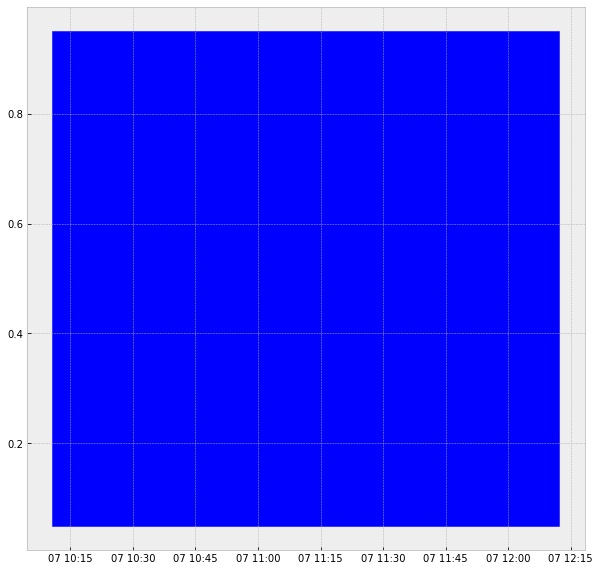

In [112]:
good_sections = boiler_meter.good_sections(full_results=True)
good_sections.plot()

Los fragmentos azules muestran dónde son buenos los datos. Una brecha blanca seria en datos incompletos en los datos de potencia bruta. Teoriacamente podria habermuchos huecos más pequeños que no podemos ver en este nivel de zoom.

También podemos ver las secciones exactas identificadas:

In [113]:
good_sections.combined()

[TimeFrame(start='2023-03-07 11:10:38+01:00', end='2023-03-07 13:12:15+01:00', empty=False)]

## Dropout rate (tasa de deserción )

Además de que puede aparecer grandes lagunas debido a que todo el sistema está inactivo, también podemo teners pequeñas lagunas frecuentes debido a que algunos sensores  arrojan datos. A esto a veces se le llama "abandono". La tasa de abandono es un número entre 0 y 1 que especifica la proporción de muestras que faltan. Una tasa de abandono de 0 significa que no faltan muestras. Un valor de 1 significaría que faltan todas las muestras:

In [114]:
boiler_meter.dropout_rate()

0.0

## Seleccion de subgrupos de medidores

Usamos ElecMeter.select_using_appliances () para seleccionar un nuevo MeterGroup usando un campo de metadatos. Por ejemplo, para obtener todas los ventiladore del conjunto de datos DSUALMH::

In [115]:
import nilmtk
nilmtk.global_meter_group.select_using_appliances(type='fan')

MeterGroup(meters=
  ElecMeter(instance=9, building=1, dataset='dsualmh', appliances=[Appliance(type='fan', instance=1)])
)

O seleccione varios tipos de aparatos:

In [116]:
elec.select_using_appliances(type=['television', 'fan'])

MeterGroup(meters=
  ElecMeter(instance=4, building=1, dataset='dsualmh', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=9, building=1, dataset='dsualmh', appliances=[Appliance(type='fan', instance=1)])
)

O todos los electrodomésticos del edificio 1 con motor de inducción monofásico (!):

In [117]:
nilmtk.global_meter_group.select_using_appliances(building=1, category='single-phase induction motor')

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='dsualmh', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=6, building=1, dataset='dsualmh', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=9, building=1, dataset='dsualmh', appliances=[Appliance(type='fan', instance=1)])
  ElecMeter(instance=10, building=1, dataset='dsualmh', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=11, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])
)

(NILMTK importa los 'metadatos comunes' del proyecto de metadatos NILM, que incluye una amplia gama de taxonomías de diferentes categorías)(http://nilm-metadata.readthedocs.org/en/latest/central_metadata.html#appliancetype))

## Medidas disponibles para cada medidor exceptuando la potencia

In [118]:
elec.available_physical_quantities() #todas las medidas del MeterGroup

['current', 'frequency', 'pf', 'power', 'voltage']

In [119]:
elec[1].available_physical_quantities() #medidas de ElecMeter 1 (mains)



['current', 'frequency', 'pf', 'power', 'voltage']

In [120]:
elec[2].available_physical_quantities() #medidas de ElecMeter 2 (horno)


['current', 'frequency', 'pf', 'power', 'voltage']

In [121]:
elec[3].available_physical_quantities() #medidas de ElecMeter 3 (micro)


['current', 'frequency', 'pf', 'power', 'voltage']

In [122]:
elec[4].available_physical_quantities() #medidas de ElecMeter 4 (tv)


['current', 'frequency', 'pf', 'power', 'voltage']

In [123]:
elec[5].available_physical_quantities() #medidas de ElecMeter 5 (hervidor)


['current', 'frequency', 'pf', 'power', 'voltage']

In [124]:
elec[6].available_physical_quantities() #medidas de ElecMeter 6 (aspiradora)


['current', 'frequency', 'pf', 'power', 'voltage']

In [125]:
elec[7].available_physical_quantities() #medidas de ElecMeter 7 (estufa)

['current', 'frequency', 'pf', 'power', 'voltage']

In [126]:
elec[8].available_physical_quantities() #medidas de ElecMeter 8 (calentador)

['current', 'frequency', 'pf', 'power', 'voltage']

In [127]:
elec[9].available_physical_quantities() #medidas de ElecMeter 9 (ventilador)

['current', 'frequency', 'pf', 'power', 'voltage']

In [128]:
elec[10].available_physical_quantities() #medidas de ElecMeter 10 (nevera)

['current', 'frequency', 'pf', 'power', 'voltage']

In [129]:
elec[11].available_physical_quantities() #medidas de ElecMeter 6 (congelador)

['current', 'frequency', 'pf', 'power', 'voltage']

## Medidas disponibles relativas a la potencia


In [130]:
elec[1].available_ac_types('power') #medidas de potencia de ElecMeter 1 

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [131]:
elec[2].available_ac_types('power') #medidas de potencia de ElecMeter 2

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [132]:
elec[3].available_ac_types('power') #medidas de potencia de ElecMeter 3

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [133]:
elec[4].available_ac_types('power') #medidas de potencia de ElecMeter 4

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [134]:
elec[5].available_ac_types('power') #medidas de potencia de ElecMeter 5

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [135]:
elec[6].available_ac_types('power') #medidas de potencia de ElecMeter 6

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [136]:
elec[7].available_ac_types('power') #medidas de potencia de ElecMeter 7

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [137]:
elec[8].available_ac_types('power') #medidas de potencia de ElecMeter 8

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [138]:
elec[9].available_ac_types('power') #medidas de potencia de ElecMeter 9

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [139]:
elec[10].available_ac_types('power') #medidas de potencia de ElecMeter 10

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

In [140]:
elec[11].available_ac_types('power') #medidas de potencia de ElecMeter 11

['active',
 'apparent',
 'reactive',
 'armonic1',
 'armonic2',
 'armonic3',
 'armonic4',
 'armonic5',
 'armonic6',
 'armonic7',
 'armonic8',
 'armonic9',
 'armonic10',
 'armonic11',
 'armonic12',
 'armonic13',
 'armonic14',
 'armonic15',
 'armonic16',
 'armonic17',
 'armonic18',
 'armonic19',
 'armonic20',
 'armonic21',
 'armonic22',
 'armonic23',
 'armonic24',
 'armonic25',
 'armonic26',
 'armonic27',
 'armonic28',
 'armonic29',
 'armonic30',
 'armonic31',
 'armonic32',
 'armonic33',
 'armonic34',
 'armonic35',
 'armonic36',
 'armonic37',
 'armonic38',
 'armonic39',
 'armonic40',
 'armonic41',
 'armonic42',
 'armonic43',
 'armonic44',
 'armonic45',
 'armonic46',
 'armonic47',
 'armonic48',
 'armonic49',
 'armonic50']

Del atributo 'elec' se puede obtener información de los medidores

En caso de consultar por una medición en específico, se pueden usar los siguientes tipos de mediciones tanto en ‘available_physical_quantities’ como en ‘available_ac_types’: 'power', 'energy', 'cumulative energy', 'voltage', 'current', 'pf', 'frequency', 'power factor', 'state', 'phase angle'.

### Medidas disponibles por electrodomestico o aparato

Podemos  ver las medidas desde otro punto de vista

Veamos qué medidas tenemos para el frigorífico,hervidor,luz,tv,etc:

In [141]:
fan = elec['fan']
fan.available_columns()

[('current', 'armonic16'),
 ('voltage', 'armonic24'),
 ('current', 'armonic21'),
 ('power', 'armonic32'),
 ('voltage', 'armonic4'),
 ('voltage', 'armonic1'),
 ('voltage', 'armonic29'),
 ('current', 'armonic45'),
 ('power', 'armonic6'),
 ('voltage', 'armonic25'),
 ('power', 'armonic14'),
 ('power', 'armonic9'),
 ('power', 'armonic2'),
 ('current', 'armonic17'),
 ('current', 'armonic37'),
 ('current', 'armonic49'),
 ('power', 'armonic20'),
 ('voltage', 'armonic9'),
 ('current', 'armonic7'),
 ('power', 'armonic46'),
 ('power', 'armonic48'),
 ('power', 'active'),
 ('voltage', 'armonic32'),
 ('current', 'armonic27'),
 ('power', 'armonic41'),
 ('voltage', 'armonic40'),
 ('power', 'armonic13'),
 ('current', 'armonic9'),
 ('current', 'armonic20'),
 ('voltage', 'armonic22'),
 ('power', 'reactive'),
 ('voltage', 'armonic27'),
 ('voltage', 'armonic19'),
 ('voltage', 'armonic7'),
 ('voltage', 'armonic13'),
 ('current', 'armonic42'),
 ('voltage', 'armonic8'),
 ('current', 'armonic46'),
 ('power', '

In [142]:
kettle = elec['kettle']
kettle.available_columns()

[('current', 'armonic16'),
 ('voltage', 'armonic24'),
 ('current', 'armonic21'),
 ('power', 'armonic32'),
 ('voltage', 'armonic4'),
 ('voltage', 'armonic1'),
 ('voltage', 'armonic29'),
 ('current', 'armonic45'),
 ('power', 'armonic6'),
 ('voltage', 'armonic25'),
 ('power', 'armonic14'),
 ('power', 'armonic9'),
 ('power', 'armonic2'),
 ('current', 'armonic17'),
 ('current', 'armonic37'),
 ('current', 'armonic49'),
 ('power', 'armonic20'),
 ('voltage', 'armonic9'),
 ('current', 'armonic7'),
 ('power', 'armonic46'),
 ('power', 'armonic48'),
 ('power', 'active'),
 ('voltage', 'armonic32'),
 ('current', 'armonic27'),
 ('power', 'armonic41'),
 ('voltage', 'armonic40'),
 ('power', 'armonic13'),
 ('current', 'armonic9'),
 ('current', 'armonic20'),
 ('voltage', 'armonic22'),
 ('power', 'reactive'),
 ('voltage', 'armonic27'),
 ('voltage', 'armonic19'),
 ('voltage', 'armonic7'),
 ('voltage', 'armonic13'),
 ('current', 'armonic42'),
 ('voltage', 'armonic8'),
 ('current', 'armonic46'),
 ('power', '

In [143]:
fan = elec['fan']
fan.available_columns()

[('current', 'armonic16'),
 ('voltage', 'armonic24'),
 ('current', 'armonic21'),
 ('power', 'armonic32'),
 ('voltage', 'armonic4'),
 ('voltage', 'armonic1'),
 ('voltage', 'armonic29'),
 ('current', 'armonic45'),
 ('power', 'armonic6'),
 ('voltage', 'armonic25'),
 ('power', 'armonic14'),
 ('power', 'armonic9'),
 ('power', 'armonic2'),
 ('current', 'armonic17'),
 ('current', 'armonic37'),
 ('current', 'armonic49'),
 ('power', 'armonic20'),
 ('voltage', 'armonic9'),
 ('current', 'armonic7'),
 ('power', 'armonic46'),
 ('power', 'armonic48'),
 ('power', 'active'),
 ('voltage', 'armonic32'),
 ('current', 'armonic27'),
 ('power', 'armonic41'),
 ('voltage', 'armonic40'),
 ('power', 'armonic13'),
 ('current', 'armonic9'),
 ('current', 'armonic20'),
 ('voltage', 'armonic22'),
 ('power', 'reactive'),
 ('voltage', 'armonic27'),
 ('voltage', 'armonic19'),
 ('voltage', 'armonic7'),
 ('voltage', 'armonic13'),
 ('current', 'armonic42'),
 ('voltage', 'armonic8'),
 ('current', 'armonic46'),
 ('power', '

In [144]:
television = elec['television']
television.available_columns()

[('current', 'armonic16'),
 ('voltage', 'armonic24'),
 ('current', 'armonic21'),
 ('power', 'armonic32'),
 ('voltage', 'armonic4'),
 ('voltage', 'armonic1'),
 ('voltage', 'armonic29'),
 ('current', 'armonic45'),
 ('power', 'armonic6'),
 ('voltage', 'armonic25'),
 ('power', 'armonic14'),
 ('power', 'armonic9'),
 ('power', 'armonic2'),
 ('current', 'armonic17'),
 ('current', 'armonic37'),
 ('current', 'armonic49'),
 ('power', 'armonic20'),
 ('voltage', 'armonic9'),
 ('current', 'armonic7'),
 ('power', 'armonic46'),
 ('power', 'armonic48'),
 ('power', 'active'),
 ('voltage', 'armonic32'),
 ('current', 'armonic27'),
 ('power', 'armonic41'),
 ('voltage', 'armonic40'),
 ('power', 'armonic13'),
 ('current', 'armonic9'),
 ('current', 'armonic20'),
 ('voltage', 'armonic22'),
 ('power', 'reactive'),
 ('voltage', 'armonic27'),
 ('voltage', 'armonic19'),
 ('voltage', 'armonic7'),
 ('voltage', 'armonic13'),
 ('current', 'armonic42'),
 ('voltage', 'armonic8'),
 ('current', 'armonic46'),
 ('power', '

In [145]:
vacuum_cleaner = elec['vacuum cleaner']
vacuum_cleaner.available_columns()

[('current', 'armonic16'),
 ('voltage', 'armonic24'),
 ('current', 'armonic21'),
 ('power', 'armonic32'),
 ('voltage', 'armonic4'),
 ('voltage', 'armonic1'),
 ('voltage', 'armonic29'),
 ('current', 'armonic45'),
 ('power', 'armonic6'),
 ('voltage', 'armonic25'),
 ('power', 'armonic14'),
 ('power', 'armonic9'),
 ('power', 'armonic2'),
 ('current', 'armonic17'),
 ('current', 'armonic37'),
 ('current', 'armonic49'),
 ('power', 'armonic20'),
 ('voltage', 'armonic9'),
 ('current', 'armonic7'),
 ('power', 'armonic46'),
 ('power', 'armonic48'),
 ('power', 'active'),
 ('voltage', 'armonic32'),
 ('current', 'armonic27'),
 ('power', 'armonic41'),
 ('voltage', 'armonic40'),
 ('power', 'armonic13'),
 ('current', 'armonic9'),
 ('current', 'armonic20'),
 ('voltage', 'armonic22'),
 ('power', 'reactive'),
 ('voltage', 'armonic27'),
 ('voltage', 'armonic19'),
 ('voltage', 'armonic7'),
 ('voltage', 'armonic13'),
 ('current', 'armonic42'),
 ('voltage', 'armonic8'),
 ('current', 'armonic46'),
 ('power', '

In [146]:
microwave = elec['microwave']
microwave.available_columns()

[('current', 'armonic16'),
 ('voltage', 'armonic24'),
 ('current', 'armonic21'),
 ('power', 'armonic32'),
 ('voltage', 'armonic4'),
 ('voltage', 'armonic1'),
 ('voltage', 'armonic29'),
 ('current', 'armonic45'),
 ('power', 'armonic6'),
 ('voltage', 'armonic25'),
 ('power', 'armonic14'),
 ('power', 'armonic9'),
 ('power', 'armonic2'),
 ('current', 'armonic17'),
 ('current', 'armonic37'),
 ('current', 'armonic49'),
 ('power', 'armonic20'),
 ('voltage', 'armonic9'),
 ('current', 'armonic7'),
 ('power', 'armonic46'),
 ('power', 'armonic48'),
 ('power', 'active'),
 ('voltage', 'armonic32'),
 ('current', 'armonic27'),
 ('power', 'armonic41'),
 ('voltage', 'armonic40'),
 ('power', 'armonic13'),
 ('current', 'armonic9'),
 ('current', 'armonic20'),
 ('voltage', 'armonic22'),
 ('power', 'reactive'),
 ('voltage', 'armonic27'),
 ('voltage', 'armonic19'),
 ('voltage', 'armonic7'),
 ('voltage', 'armonic13'),
 ('current', 'armonic42'),
 ('voltage', 'armonic8'),
 ('current', 'armonic46'),
 ('power', '

In [147]:
electric_furnace = elec['electric furnace']
electric_furnace.available_columns()

[('current', 'armonic16'),
 ('voltage', 'armonic24'),
 ('current', 'armonic21'),
 ('power', 'armonic32'),
 ('voltage', 'armonic4'),
 ('voltage', 'armonic1'),
 ('voltage', 'armonic29'),
 ('current', 'armonic45'),
 ('power', 'armonic6'),
 ('voltage', 'armonic25'),
 ('power', 'armonic14'),
 ('power', 'armonic9'),
 ('power', 'armonic2'),
 ('current', 'armonic17'),
 ('current', 'armonic37'),
 ('current', 'armonic49'),
 ('power', 'armonic20'),
 ('voltage', 'armonic9'),
 ('current', 'armonic7'),
 ('power', 'armonic46'),
 ('power', 'armonic48'),
 ('power', 'active'),
 ('voltage', 'armonic32'),
 ('current', 'armonic27'),
 ('power', 'armonic41'),
 ('voltage', 'armonic40'),
 ('power', 'armonic13'),
 ('current', 'armonic9'),
 ('current', 'armonic20'),
 ('voltage', 'armonic22'),
 ('power', 'reactive'),
 ('voltage', 'armonic27'),
 ('voltage', 'armonic19'),
 ('voltage', 'armonic7'),
 ('voltage', 'armonic13'),
 ('current', 'armonic42'),
 ('voltage', 'armonic8'),
 ('current', 'armonic46'),
 ('power', '

In [148]:
electric_space_heater = elec['electric space heater']
electric_space_heater.available_columns()

[('current', 'armonic16'),
 ('voltage', 'armonic24'),
 ('current', 'armonic21'),
 ('power', 'armonic32'),
 ('voltage', 'armonic4'),
 ('voltage', 'armonic1'),
 ('voltage', 'armonic29'),
 ('current', 'armonic45'),
 ('power', 'armonic6'),
 ('voltage', 'armonic25'),
 ('power', 'armonic14'),
 ('power', 'armonic9'),
 ('power', 'armonic2'),
 ('current', 'armonic17'),
 ('current', 'armonic37'),
 ('current', 'armonic49'),
 ('power', 'armonic20'),
 ('voltage', 'armonic9'),
 ('current', 'armonic7'),
 ('power', 'armonic46'),
 ('power', 'armonic48'),
 ('power', 'active'),
 ('voltage', 'armonic32'),
 ('current', 'armonic27'),
 ('power', 'armonic41'),
 ('voltage', 'armonic40'),
 ('power', 'armonic13'),
 ('current', 'armonic9'),
 ('current', 'armonic20'),
 ('voltage', 'armonic22'),
 ('power', 'reactive'),
 ('voltage', 'armonic27'),
 ('voltage', 'armonic19'),
 ('voltage', 'armonic7'),
 ('voltage', 'armonic13'),
 ('current', 'armonic42'),
 ('voltage', 'armonic8'),
 ('current', 'armonic46'),
 ('power', '

In [149]:
electric_shower_heater = elec['electric shower heater']
electric_shower_heater.available_columns()

[('current', 'armonic16'),
 ('voltage', 'armonic24'),
 ('current', 'armonic21'),
 ('power', 'armonic32'),
 ('voltage', 'armonic4'),
 ('voltage', 'armonic1'),
 ('voltage', 'armonic29'),
 ('current', 'armonic45'),
 ('power', 'armonic6'),
 ('voltage', 'armonic25'),
 ('power', 'armonic14'),
 ('power', 'armonic9'),
 ('power', 'armonic2'),
 ('current', 'armonic17'),
 ('current', 'armonic37'),
 ('current', 'armonic49'),
 ('power', 'armonic20'),
 ('voltage', 'armonic9'),
 ('current', 'armonic7'),
 ('power', 'armonic46'),
 ('power', 'armonic48'),
 ('power', 'active'),
 ('voltage', 'armonic32'),
 ('current', 'armonic27'),
 ('power', 'armonic41'),
 ('voltage', 'armonic40'),
 ('power', 'armonic13'),
 ('current', 'armonic9'),
 ('current', 'armonic20'),
 ('voltage', 'armonic22'),
 ('power', 'reactive'),
 ('voltage', 'armonic27'),
 ('voltage', 'armonic19'),
 ('voltage', 'armonic7'),
 ('voltage', 'armonic13'),
 ('current', 'armonic42'),
 ('voltage', 'armonic8'),
 ('current', 'armonic46'),
 ('power', '

In [150]:
fridge = elec[10]
fridge.available_columns()

[('current', 'armonic16'),
 ('voltage', 'armonic24'),
 ('current', 'armonic21'),
 ('power', 'armonic32'),
 ('voltage', 'armonic4'),
 ('voltage', 'armonic1'),
 ('voltage', 'armonic29'),
 ('current', 'armonic45'),
 ('power', 'armonic6'),
 ('voltage', 'armonic25'),
 ('power', 'armonic14'),
 ('power', 'armonic9'),
 ('power', 'armonic2'),
 ('current', 'armonic17'),
 ('current', 'armonic37'),
 ('current', 'armonic49'),
 ('power', 'armonic20'),
 ('voltage', 'armonic9'),
 ('current', 'armonic7'),
 ('power', 'armonic46'),
 ('power', 'armonic48'),
 ('power', 'active'),
 ('voltage', 'armonic32'),
 ('current', 'armonic27'),
 ('power', 'armonic41'),
 ('voltage', 'armonic40'),
 ('power', 'armonic13'),
 ('current', 'armonic9'),
 ('current', 'armonic20'),
 ('voltage', 'armonic22'),
 ('power', 'reactive'),
 ('voltage', 'armonic27'),
 ('voltage', 'armonic19'),
 ('voltage', 'armonic7'),
 ('voltage', 'armonic13'),
 ('current', 'armonic42'),
 ('voltage', 'armonic8'),
 ('current', 'armonic46'),
 ('power', '

In [151]:
freezer = elec[11]
freezer.available_columns()

[('current', 'armonic16'),
 ('voltage', 'armonic24'),
 ('current', 'armonic21'),
 ('power', 'armonic32'),
 ('voltage', 'armonic4'),
 ('voltage', 'armonic1'),
 ('voltage', 'armonic29'),
 ('current', 'armonic45'),
 ('power', 'armonic6'),
 ('voltage', 'armonic25'),
 ('power', 'armonic14'),
 ('power', 'armonic9'),
 ('power', 'armonic2'),
 ('current', 'armonic17'),
 ('current', 'armonic37'),
 ('current', 'armonic49'),
 ('power', 'armonic20'),
 ('voltage', 'armonic9'),
 ('current', 'armonic7'),
 ('power', 'armonic46'),
 ('power', 'armonic48'),
 ('power', 'active'),
 ('voltage', 'armonic32'),
 ('current', 'armonic27'),
 ('power', 'armonic41'),
 ('voltage', 'armonic40'),
 ('power', 'armonic13'),
 ('current', 'armonic9'),
 ('current', 'armonic20'),
 ('voltage', 'armonic22'),
 ('power', 'reactive'),
 ('voltage', 'armonic27'),
 ('voltage', 'armonic19'),
 ('voltage', 'armonic7'),
 ('voltage', 'armonic13'),
 ('current', 'armonic42'),
 ('voltage', 'armonic8'),
 ('current', 'armonic46'),
 ('power', '

## Resumen de mediciones

Ahora veamos un resumen de las medidas disponibles por cada medidor

In [152]:
print('Mediciones disponibles - Dataset: '+str(elec.available_physical_quantities()))
print('Mediciones de Potencia disponibles - Dataset: '+str(elec.available_ac_types('power')))

print('\nMedidas disponibles por cada medidor:')
for x in range(len(labels)):
    print(str(labels['Meters'][x])+': '+str(elec[x+1].available_physical_quantities()))

print('\nMedidas de potencia por cada medidor:')  
for x in range(len(labels)):
    print(str(labels['Meters'][x])+': '+str(elec[x+1].available_ac_types('power')))

Mediciones disponibles - Dataset: ['current', 'frequency', 'pf', 'power', 'voltage']
Mediciones de Potencia disponibles - Dataset: ['armonic46', 'reactive', 'armonic20', 'armonic17', 'armonic1', 'armonic18', 'armonic29', 'armonic11', 'armonic12', 'armonic24', 'armonic22', 'armonic19', 'armonic3', 'armonic27', 'armonic21', 'armonic32', 'armonic25', 'armonic43', 'armonic13', 'armonic35', 'armonic33', 'armonic41', 'armonic44', 'armonic34', 'armonic14', 'armonic2', 'armonic31', 'armonic30', 'armonic16', 'armonic39', 'armonic48', 'armonic15', 'armonic49', 'armonic8', 'armonic38', 'armonic45', 'active', 'armonic4', 'armonic28', 'armonic47', 'armonic50', 'armonic9', 'armonic40', 'armonic10', 'armonic23', 'armonic37', 'armonic26', 'apparent', 'armonic36', 'armonic5', 'armonic42', 'armonic6', 'armonic7']

Medidas disponibles por cada medidor:
Main: ['current', 'frequency', 'pf', 'power', 'voltage']
Electric furnace: ['current', 'frequency', 'pf', 'power', 'voltage']
Microwave: ['current', 'freq

Los dispositivos se identifican de forma única dentro de un edificio por un tipo (luces, televisión, etc.) y un número de instancia. Si no se especifica un número de instancia, ElecMeter recupera la instancia 1.

### Esquema de red

In [153]:
 def draw_wiring_graph_2(self, show_meter_labels=True):
        graph = self.wiring_graph()
        
        try:
            # Try using graphviz layout...
            pos = nx.drawing.nx_agraph.graphviz_layout(graph, prog='dot')
            used_graphviz = True
        except:
            # ...and fallback to shell layout if graphviz is not installed or
            # doesn't work
            pos = nx.shell_layout(graph)
            used_graphviz = False
            
        meter_labels = {}
        if show_meter_labels:
            meter_labels = {meter: meter.label() for meter in graph.nodes()}
            for meter, name in meter_labels.items():
                x, y = pos[meter]

                if used_graphviz:
                    if meter.is_site_meter():
                        delta_y = 5
                    else:
                        delta_y = -5
                    
                    plt.text(x, y + delta_y, s=name, bbox=dict(facecolor='red', alpha=0.5), horizontalalignment='center')
       

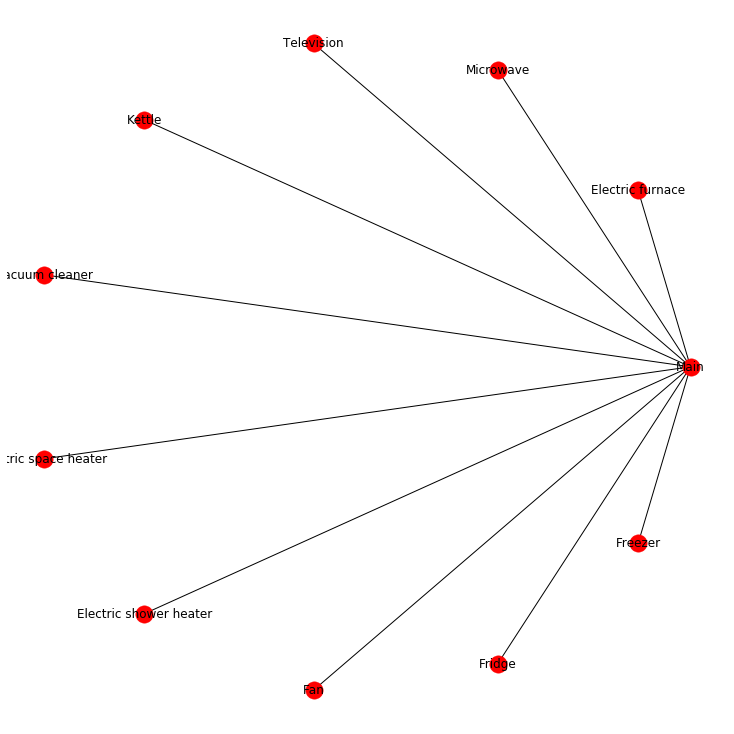

In [154]:
rcParams['figure.figsize'] = (10, 10)
fig = elec.draw_wiring_graph_2(show_meter_labels=False)

#etiquetas, opcional
pos = nx.shell_layout(fig[0])
nx.draw_networkx_labels(fig[0], pos, labels=Meters)

#guarda gráfico
plt.savefig('./data/images/2.1_Network.svg', bbox_inches='tight', transparent=True)
pass

NOTA: La funcion draw_wiring_graph  presenta problemas con Matplotlib 3.3.0 (y por tanto con NILMTK) segun issue 868 ( https://github.com/nilmtk/nilmtk/issues/868)), por lo que necesitamos reemplazar la función original para poder representar graficamente correctamente las etiquetas, por lo que vamos a crear la nueva funcion elec.draw_wiring_graph_2 que guardaremos en la ruta \user\USUARIO\anaconda3\envs\nilmtk-env\Lib\site-packages\nilmtk\metergroup.py

## Carga de datos en memoria

Intervalos de tiempo en que se registran datos: `elec[1]`

Timestamp en "timezone" es  "Europe/Madrid" https://www.epochconverter.com/

In [155]:
elec.get_timeframe()

TimeFrame(start='2023-03-07 11:10:38+01:00', end='2023-03-07 13:12:15+01:00', empty=False)

Una manera rápida de cargar varios datos de medidores en un DataFrame es utilizar la función `dataframe_of_meters` e indicar cual medida se desea importar desde el MeterGroup.

Observese que solo podemos tomar datos de potencia :active', 'apparent', 'reactive'.




Vamos a mostrar la potencia activa de los medidores del 2 al 11 (es decir todos menos el principal). 

In [156]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='active') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:12])]
df

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
2023-03-07 11:10:00+01:00,8.736293,7.425974,3.417993,9.282116,7.090158,9.360298,9.407841,8.282000,9.769106,8.530680
2023-03-07 11:11:00+01:00,8.242806,1005.352539,3.043011,10.355904,6.752708,9.101993,1001.376343,30.299625,9.128572,8.009095
2023-03-07 11:12:00+01:00,8.162766,1192.359253,2.941083,10.633374,6.478604,9.154854,1153.701660,33.417152,8.962694,7.871211
2023-03-07 11:13:00+01:00,8.509245,179.789810,3.228436,9.501419,602.397522,9.317653,174.449219,11.780659,9.433947,8.326084
2023-03-07 11:14:00+01:00,8.599349,6.917178,3.322737,9.273390,689.681213,9.335614,9.057565,8.134767,9.535052,8.430833
...,...,...,...,...,...,...,...,...,...,...
2023-03-07 13:08:00+01:00,8.644561,1221.730225,36.210995,11.452597,686.830017,8.072697,8.739935,35.173248,68.908745,9.224905
2023-03-07 13:09:00+01:00,8.642417,1208.775024,36.113918,11.255421,505.747131,8.481352,8.788926,35.360058,67.595314,35.294678
2023-03-07 13:10:00+01:00,8.753292,1200.001831,36.011757,11.374311,6.535860,8.608611,8.888576,35.625957,67.156403,66.909576
2023-03-07 13:11:00+01:00,8.738419,883.726379,27.587330,10.569299,6.526439,8.555268,8.878031,28.600861,52.190022,48.337955


Ahora veamos la potencia reactiva de los medidores del 2 al 6 (todos menos el principal).

In [157]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='reactive') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:12])]
df

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
2023-03-07 11:10:00+01:00,-2.019701,-2.255860,-1.654389,-2.339900,-1.078213,-3.260932,-2.797649,-3.587031,-1.798988,-2.908646
2023-03-07 11:11:00+01:00,-1.777144,364.842102,-1.472253,-2.766885,-1.051509,-3.129782,-1.347650,-3.333890,-1.795415,-2.791667
2023-03-07 11:12:00+01:00,-1.782398,379.917908,-1.459327,-2.925729,-1.050459,-3.151175,-1.380151,-3.604555,-1.861729,-2.801501
2023-03-07 11:13:00+01:00,-2.026478,51.783581,-1.595134,-2.326277,38.642662,-3.262123,-2.806911,-3.667592,-1.911316,-2.938560
2023-03-07 11:14:00+01:00,-2.080529,-2.304233,-1.662503,-2.234543,42.345303,-3.319265,-3.084054,-3.527526,-1.915823,-2.869786
...,...,...,...,...,...,...,...,...,...,...
2023-03-07 13:08:00+01:00,-1.773819,413.821167,-10.485499,-3.159504,37.762730,-3.167038,-2.764742,-3.390670,8.120720,-3.232997
2023-03-07 13:09:00+01:00,-1.794829,401.003693,-10.598455,-3.117389,27.401661,-3.352432,-2.790724,-3.452050,8.232163,4.848520
2023-03-07 13:10:00+01:00,-1.708426,407.011200,-10.891865,-3.337682,-1.312524,-3.481375,-2.785291,-3.539579,8.463218,14.187236
2023-03-07 13:11:00+01:00,-1.854790,294.014496,-8.821270,-3.064396,-1.301301,-3.463948,-2.758747,-3.458657,5.704713,9.732674


Por ultimo, veamos la potencia aparente de los medidores del 2 al 11 (todos menos el principal).

In [158]:
Devices = elec.select(instance=[2,3,4,5,6,7,8,9,10,11])  #nuevo MeterGroup de dispositivos
df = Devices.dataframe_of_meters(ac_type='apparent') # active crea Dataframe badado en la potencia Valid AC types = ['active', 'apparent', 'reactive'].
#etiquetas
df.columns = [list(labels['Meters'][1:12])]
df

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
2023-03-07 11:10:00+01:00,8.974254,7.775111,3.804174,9.581534,7.182541,9.915387,9.820017,9.049794,9.936172,9.020437
2023-03-07 11:11:00+01:00,8.441184,1082.850586,3.389313,10.734695,6.848741,9.628225,1001.436157,30.542427,9.306473,8.488317
2023-03-07 11:12:00+01:00,8.364808,1251.460815,3.291454,11.041277,6.576358,9.684772,1153.702515,33.616970,9.158269,8.363773
2023-03-07 11:13:00+01:00,8.763378,188.260941,3.609519,9.822177,603.697632,9.877041,174.907211,12.620271,9.630011,8.875997
2023-03-07 11:14:00+01:00,8.853654,7.306756,3.723840,9.547350,690.980286,9.911135,9.572784,8.887359,9.728581,8.913923
...,...,...,...,...,...,...,...,...,...,...
2023-03-07 13:08:00+01:00,8.834238,1289.930054,37.699596,11.899589,687.868225,8.676427,9.171579,35.346424,69.386909,9.788071
2023-03-07 13:09:00+01:00,8.843115,1273.579468,37.638428,11.725695,506.552246,9.125580,9.226917,35.558556,68.096802,36.660740
2023-03-07 13:10:00+01:00,8.929551,1267.151733,37.624012,11.881701,6.693266,9.290974,9.319632,35.806778,67.688988,68.399536
2023-03-07 13:11:00+01:00,8.945592,931.728882,29.010574,11.045566,6.674392,9.234453,9.301411,28.966055,52.662815,49.673168


Se puede obtener el tipo de datos usado para cada medidor usandola clase info

In [68]:
df.info() #información del DataFrame

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 123 entries, 2023-03-07 11:10:00+01:00 to 2023-03-07 13:12:00+01:00
Freq: 60S
Data columns (total 10 columns):
(Electric furnace,)          123 non-null float32
(Microwave,)                 123 non-null float32
(Television,)                123 non-null float32
(Kettle,)                    123 non-null float32
(Vacuum cleaner,)            123 non-null float32
(Electric space heater,)     123 non-null float32
(Electric shower heater,)    123 non-null float32
(Fan,)                       123 non-null float32
(Fridge,)                    123 non-null float32
(Freezer,)                   123 non-null float32
dtypes: float32(10)
memory usage: 5.8 KB


Podemos asignar individualmente datos de medidores en un Dataframe




Vemos para el meter nº 2 (Horno)  tenemos la siguinte tabla que nos muestra todas las medidas

In [159]:
t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final


df_ef = next(elec[2].load())[t0:t1] #DataFrame medidor 
df_ef

physical_quantity           current   voltage   current         power  \
type                      armonic16 armonic24 armonic21     armonic32   
2023-03-07 11:10:38+01:00  0.001391  0.009242  0.000966 -3.000000e-06   
2023-03-07 11:10:39+01:00  0.000962  0.008022  0.001115  3.800000e-06   
2023-03-07 11:10:40+01:00  0.000426  0.011829  0.000454 -2.000000e-07   
2023-03-07 11:10:41+01:00  0.000698  0.005247  0.000620  2.400000e-06   
2023-03-07 11:10:42+01:00  0.000754  0.007290  0.000797  1.200000e-06   
...                             ...       ...       ...           ...   
2023-03-07 13:12:11+01:00  0.000605  0.008661  0.000569  6.000000e-07   
2023-03-07 13:12:12+01:00  0.000542  0.009500  0.000643  1.800000e-06   
2023-03-07 13:12:13+01:00  0.000588  0.010060  0.000944  5.800000e-06   
2023-03-07 13:12:14+01:00  0.000979  0.005292  0.000901  2.200000e-06   
2023-03-07 13:12:15+01:00  0.000222  0.007824  0.000239  1.000000e-06   

physical_quantity             voltage             current         power  \
type                         armonic1 armonic29 armonic45      armonic6   
2023-03-07 11:10:38+01:00  248.282532  0.064071  0.000595 -4.800000e-06   
2023-03-07 11:10:39+01:00  248.330917  0.066415  0.000946 -8.400000e-06   
2023-03-07 11:10:40+01:00  248.236359  0.066281  0.000401 -4.400000e-06   
2023-03-07 11:10:41+01:00  248.324982  0.066492  0.000441 -6.000000e-07   
2023-03-07 11:10:42+01:00  248.270370  0.058975  0.000674 -8.600000e-06   
...                               ...       ...       ...           ...   
2023-03-07 13:12:11+01:00  249.861893  0.022980  0.000638  1.384000e-04   
2023-03-07 13:12:12+01:00  249.917007  0.019711  0.000509  1.120000e-04   
2023-03-07 13:12:13+01:00  249.732788  0.024480  0.000564  6.880000e-05   
2023-03-07 13:12:14+01:00  249.905319  0.034908  0.000470 -1.788000e-04   
2023-03-07 13:12:15+01:00  249.839172  0.030231  0.000261 -1.000000e-06   

physical_quantity           voltage         power  ...   voltage   current  \
type                      armonic25     armonic14  ... armonic34  armonic6   
2023-03-07 11:10:38+01:00  0.127533  8.600000e-06  ...  0.009554  0.001811   
2023-03-07 11:10:39+01:00  0.129051  2.200000e-05  ...  0.009357  0.000686   
2023-03-07 11:10:40+01:00  0.132923  3.800000e-06  ...  0.007619  0.000860   
2023-03-07 11:10:41+01:00  0.128160  1.640000e-05  ...  0.005257  0.000817   
2023-03-07 11:10:42+01:00  0.134971 -1.200000e-06  ...  0.007547  0.000683   
...                             ...           ...  ...       ...       ...   
2023-03-07 13:12:11+01:00  0.054120  8.000001e-07  ...  0.007682  0.001380   
2023-03-07 13:12:12+01:00  0.059299  2.000000e-07  ...  0.008393  0.001010   
2023-03-07 13:12:13+01:00  0.031565  3.600000e-06  ...  0.011032  0.000843   
2023-03-07 13:12:14+01:00  0.041254 -7.999999e-07  ...  0.006901  0.002702   
2023-03-07 13:12:15+01:00  0.041038  1.550000e-05  ...  0.004011  0.000722   

physical_quantity                           power   current   voltage  \
type                      armonic43     armonic24 armonic24 armonic30   
2023-03-07 11:10:38+01:00  0.000955  3.800000e-06  0.001029  0.007612   
2023-03-07 11:10:39+01:00  0.000421  3.400000e-06  0.000696  0.009223   
2023-03-07 11:10:40+01:00  0.000772  6.200000e-06  0.000636  0.008359   
2023-03-07 11:10:41+01:00  0.000599 -6.000000e-07  0.000774  0.009432   
2023-03-07 11:10:42+01:00  0.000808  2.400000e-06  0.000590  0.006963   
...                             ...           ...       ...       ...   
2023-03-07 13:12:11+01:00  0.000496  4.400000e-06  0.000788  0.007735   
2023-03-07 13:12:12+01:00  0.000426  3.400000e-06  0.000665  0.004379   
2023-03-07 13:12:13+01:00  0.000575 -2.600000e-06  0.000513  0.004136   
2023-03-07 13:12:14+01:00  0.000656 -2.000000e-07  0.000603  0.008735   
2023-03-07 13:12:15+01:00  0.000424  1.000000e-06  0.000248  0.009528   

physical_quantity           current   voltage     power   voltage  
type                      armonic35 armon

Se puede visualizar solo la cabecera de los datos

In [71]:
df_ef.head()

physical_quantity           current   voltage   current         power  \
type                      armonic16 armonic24 armonic21     armonic32   
2023-03-07 11:10:38+01:00  0.001391  0.009242  0.000966 -3.000000e-06   
2023-03-07 11:10:39+01:00  0.000962  0.008022  0.001115  3.800000e-06   
2023-03-07 11:10:40+01:00  0.000426  0.011829  0.000454 -2.000000e-07   
2023-03-07 11:10:41+01:00  0.000698  0.005247  0.000620  2.400000e-06   
2023-03-07 11:10:42+01:00  0.000754  0.007290  0.000797  1.200000e-06   

physical_quantity             voltage             current         power  \
type                         armonic1 armonic29 armonic45      armonic6   
2023-03-07 11:10:38+01:00  248.282532  0.064071  0.000595 -4.800000e-06   
2023-03-07 11:10:39+01:00  248.330917  0.066415  0.000946 -8.400000e-06   
2023-03-07 11:10:40+01:00  248.236359  0.066281  0.000401 -4.400000e-06   
2023-03-07 11:10:41+01:00  248.324982  0.066492  0.000441 -6.000000e-07   
2023-03-07 11:10:42+01:00  248.270370  0.058975  0.000674 -8.600000e-06   

physical_quantity           voltage     power  ...   voltage   current  \
type                      armonic25 armonic14  ... armonic34  armonic6   
2023-03-07 11:10:38+01:00  0.127533  0.000009  ...  0.009554  0.001811   
2023-03-07 11:10:39+01:00  0.129051  0.000022  ...  0.009357  0.000686   
2023-03-07 11:10:40+01:00  0.132923  0.000004  ...  0.007619  0.000860   
2023-03-07 11:10:41+01:00  0.128160  0.000016  ...  0.005257  0.000817   
2023-03-07 11:10:42+01:00  0.134971 -0.000001  ...  0.007547  0.000683   

physical_quantity                           power   current   voltage  \
type                      armonic43     armonic24 armonic24 armonic30   
2023-03-07 11:10:38+01:00  0.000955  3.800000e-06  0.001029  0.007612   
2023-03-07 11:10:39+01:00  0.000421  3.400000e-06  0.000696  0.009223   
2023-03-07 11:10:40+01:00  0.000772  6.200000e-06  0.000636  0.008359   
2023-03-07 11:10:41+01:00  0.000599 -6.000000e-07  0.000774  0.009432   
2023-03-07 11:10:42+01:00  0.000808  2.400000e-06  0.000590  0.006963   

physical_quantity           current   voltage     power   voltage  
type                      armonic35 armonic18  armonic7 armonic33  
2023-03-07 11:10:38+01:00  0.000968  0.018072  0.002456  0.026215  
2023-03-07 11:10:39+01:00  0.000541  0.016466 -0.001934  0.033125  
2023-03-07 11:10:40+01:00  0.000634  0.024908  0.000843  0.023216  
2023-03-07 11:10:41+01:00  0.000631  0.018459  0.000422  0.024307  
2023-03-07 11:10:42+01:00  0.000605  0.017109  0.000745  0.029259  

[5 rows x 156 columns]

Vemos para el meter nº 4(Freezer) tenemos la siguinte tabla que nos muestra todas las medidas

In [73]:
t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final


df_freezer = next(elec[4].load())[t0:t1] #DataFrame medidor 
df_freezer

physical_quantity           current   voltage   current         power  \
type                      armonic16 armonic24 armonic21     armonic32   
2023-03-07 11:10:38+01:00  0.000436  0.006425  0.000276  2.600000e-06   
2023-03-07 11:10:39+01:00  0.000407  0.007278  0.000475  1.800000e-06   
2023-03-07 11:10:40+01:00  0.000471  0.007790  0.000333  1.800000e-06   
2023-03-07 11:10:41+01:00  0.000487  0.007885  0.000664  0.000000e+00   
2023-03-07 11:10:42+01:00  0.000451  0.006383  0.000350  2.000000e-07   
...                             ...       ...       ...           ...   
2023-03-07 13:12:11+01:00  0.000616  0.008285  0.000713  1.200000e-06   
2023-03-07 13:12:12+01:00  0.000377  0.009978  0.000439  2.000000e-07   
2023-03-07 13:12:13+01:00  0.000304  0.008747  0.000609  8.000000e-07   
2023-03-07 13:12:14+01:00  0.000580  0.009572  0.000430  3.800000e-06   
2023-03-07 13:12:15+01:00  0.000726  0.013669  0.000565  2.000000e-06   

physical_quantity             voltage             current     power   voltage  \
type                         armonic1 armonic29 armonic45  armonic6 armonic25   
2023-03-07 11:10:38+01:00  247.110062  0.061016  0.000479 -0.000002  0.125492   
2023-03-07 11:10:39+01:00  247.171036  0.070166  0.000338  0.000002  0.130718   
2023-03-07 11:10:40+01:00  247.079834  0.063798  0.000296 -0.000006  0.131236   
2023-03-07 11:10:41+01:00  247.156754  0.064126  0.000484 -0.000006  0.130521   
2023-03-07 11:10:42+01:00  247.108002  0.060827  0.000440 -0.000010  0.133004   
...                               ...       ...       ...       ...       ...   
2023-03-07 13:12:11+01:00  248.553360  0.022526  0.000478  0.000109  0.054869   
2023-03-07 13:12:12+01:00  248.616135  0.015684  0.000540  0.000068  0.059595   
2023-03-07 13:12:13+01:00  248.426392  0.020832  0.000283  0.000087  0.030466   
2023-03-07 13:12:14+01:00  248.599396  0.031358  0.000580  0.000053  0.041977   
2023-03-07 13:12:15+01:00  248.514786  0.032798  0.000684  0.000044  0.045457   

physical_quantity                 power  ...   voltage   current            \
type                          armonic14  ... armonic34  armonic6 armonic43   
2023-03-07 11:10:38+01:00  5.600000e-06  ...  0.003729  0.000599  0.000573   
2023-03-07 11:10:39+01:00  7.600000e-06  ...  0.007746  0.000478  0.000316   
2023-03-07 11:10:40+01:00  7.000000e-06  ...  0.005682  0.000715  0.000406   
2023-03-07 11:10:41+01:00  1.540000e-05  ...  0.006623  0.000656  0.000357   
2023-03-07 11:10:42+01:00  6.000000e-06  ...  0.007040  0.000590  0.000215   
...                                 ...  ...       ...       ...       ...   
2023-03-07 13:12:11+01:00  1.260000e-05  ...  0.008734  0.001070  0.000552   
2023-03-07 13:12:12+01:00  6.000000e-07  ...  0.006337  0.000734  0.000341   
2023-03-07 13:12:13+01:00  1.020000e-05  ...  0.006392  0.000744  0.000471   
2023-03-07 13:12:14+01:00  5.200000e-06  ...  0.009817  0.000780  0.000426   
2023-03-07 13:12:15+01:00  4.500000e-06  ...  0.003942  0.000473  0.000200   

physical_quantity                 power   current   voltage   current  \
type                          armonic24 armonic24 armonic30 armonic35   
2023-03-07 11:10:38+01:00  2.000000e-07  0.000440  0.005878  0.000252   
2023-03-07 11:10:39+01:00  1.400000e-06  0.000389  0.005794  0.000233   
2023-03-07 11:10:40+01:00  1.600000e-06  0.000487  0.006861  0.000490   
2023-03-07 11:10:41+01:00  1.000000e-06  0.000263  0.007174  0.000217   
2023-03-07 11:10:42+01:00  2.000000e-07  0.000330  0.006364  0.000473   
...                                 ...       ...       ...       ...   
2023-03-07 13:12:11+01:00 -2.400000e-06  0.000338  0.010327  0.000465   
2023-03-07 13:12:12+01:00 -6.000000e-07  0.000462  0.003650  0.000452   
2023-03-07 13:12:13+01:00 -1.000000e-06  0.000418  0.008095  0.000516   
2023-03-07 13:12:14+01:00  4.000000e-07  0.000385  0.008324  0.000426   
2023-03-07 13:12:15+01:00 -4.500000e-06  0.000374  0.003859  0.000226   

physical_quantity           vol

Vemos para el meter nº 2(boiler)  tenemos  la siguinte tabla que nos muestra todas las medidas: 

In [74]:
t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final



df_boiler = next(elec[2].load())[t0:t1] #DataFrame medidor boiler
df_boiler

physical_quantity           current   voltage   current         power  \
type                      armonic16 armonic24 armonic21     armonic32   
2023-03-07 11:10:38+01:00  0.001391  0.009242  0.000966 -3.000000e-06   
2023-03-07 11:10:39+01:00  0.000962  0.008022  0.001115  3.800000e-06   
2023-03-07 11:10:40+01:00  0.000426  0.011829  0.000454 -2.000000e-07   
2023-03-07 11:10:41+01:00  0.000698  0.005247  0.000620  2.400000e-06   
2023-03-07 11:10:42+01:00  0.000754  0.007290  0.000797  1.200000e-06   
...                             ...       ...       ...           ...   
2023-03-07 13:12:11+01:00  0.000605  0.008661  0.000569  6.000000e-07   
2023-03-07 13:12:12+01:00  0.000542  0.009500  0.000643  1.800000e-06   
2023-03-07 13:12:13+01:00  0.000588  0.010060  0.000944  5.800000e-06   
2023-03-07 13:12:14+01:00  0.000979  0.005292  0.000901  2.200000e-06   
2023-03-07 13:12:15+01:00  0.000222  0.007824  0.000239  1.000000e-06   

physical_quantity             voltage             current         power  \
type                         armonic1 armonic29 armonic45      armonic6   
2023-03-07 11:10:38+01:00  248.282532  0.064071  0.000595 -4.800000e-06   
2023-03-07 11:10:39+01:00  248.330917  0.066415  0.000946 -8.400000e-06   
2023-03-07 11:10:40+01:00  248.236359  0.066281  0.000401 -4.400000e-06   
2023-03-07 11:10:41+01:00  248.324982  0.066492  0.000441 -6.000000e-07   
2023-03-07 11:10:42+01:00  248.270370  0.058975  0.000674 -8.600000e-06   
...                               ...       ...       ...           ...   
2023-03-07 13:12:11+01:00  249.861893  0.022980  0.000638  1.384000e-04   
2023-03-07 13:12:12+01:00  249.917007  0.019711  0.000509  1.120000e-04   
2023-03-07 13:12:13+01:00  249.732788  0.024480  0.000564  6.880000e-05   
2023-03-07 13:12:14+01:00  249.905319  0.034908  0.000470 -1.788000e-04   
2023-03-07 13:12:15+01:00  249.839172  0.030231  0.000261 -1.000000e-06   

physical_quantity           voltage         power  ...   voltage   current  \
type                      armonic25     armonic14  ... armonic34  armonic6   
2023-03-07 11:10:38+01:00  0.127533  8.600000e-06  ...  0.009554  0.001811   
2023-03-07 11:10:39+01:00  0.129051  2.200000e-05  ...  0.009357  0.000686   
2023-03-07 11:10:40+01:00  0.132923  3.800000e-06  ...  0.007619  0.000860   
2023-03-07 11:10:41+01:00  0.128160  1.640000e-05  ...  0.005257  0.000817   
2023-03-07 11:10:42+01:00  0.134971 -1.200000e-06  ...  0.007547  0.000683   
...                             ...           ...  ...       ...       ...   
2023-03-07 13:12:11+01:00  0.054120  8.000001e-07  ...  0.007682  0.001380   
2023-03-07 13:12:12+01:00  0.059299  2.000000e-07  ...  0.008393  0.001010   
2023-03-07 13:12:13+01:00  0.031565  3.600000e-06  ...  0.011032  0.000843   
2023-03-07 13:12:14+01:00  0.041254 -7.999999e-07  ...  0.006901  0.002702   
2023-03-07 13:12:15+01:00  0.041038  1.550000e-05  ...  0.004011  0.000722   

physical_quantity                           power   current   voltage  \
type                      armonic43     armonic24 armonic24 armonic30   
2023-03-07 11:10:38+01:00  0.000955  3.800000e-06  0.001029  0.007612   
2023-03-07 11:10:39+01:00  0.000421  3.400000e-06  0.000696  0.009223   
2023-03-07 11:10:40+01:00  0.000772  6.200000e-06  0.000636  0.008359   
2023-03-07 11:10:41+01:00  0.000599 -6.000000e-07  0.000774  0.009432   
2023-03-07 11:10:42+01:00  0.000808  2.400000e-06  0.000590  0.006963   
...                             ...           ...       ...       ...   
2023-03-07 13:12:11+01:00  0.000496  4.400000e-06  0.000788  0.007735   
2023-03-07 13:12:12+01:00  0.000426  3.400000e-06  0.000665  0.004379   
2023-03-07 13:12:13+01:00  0.000575 -2.600000e-06  0.000513  0.004136   
2023-03-07 13:12:14+01:00  0.000656 -2.000000e-07  0.000603  0.008735   
2023-03-07 13:12:15+01:00  0.000424  1.000000e-06  0.000248  0.009528   

physical_quantity           current   voltage     power   voltage  
type                      armonic35 armon

Veamos para el meter nº 6(boiler)  tenemos la siguinte tabla que nos muestra todas las medidas

In [75]:
t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final


df_boiler = next(elec[6].load())[t0:t1] #DataFrame medidor boiler
df_boiler

physical_quantity           current   voltage   current         power  \
type                      armonic16 armonic24 armonic21     armonic32   
2023-03-07 11:10:38+01:00  0.002496  0.009242  0.001819  3.600000e-06   
2023-03-07 11:10:39+01:00  0.000737  0.008022  0.000869  7.400000e-06   
2023-03-07 11:10:40+01:00  0.000388  0.011829  0.000544 -4.000000e-07   
2023-03-07 11:10:41+01:00  0.001464  0.005247  0.001557  4.400000e-06   
2023-03-07 11:10:42+01:00  0.000612  0.007290  0.001071  3.400000e-06   
...                             ...       ...       ...           ...   
2023-03-07 13:12:11+01:00  0.000974  0.008661  0.000623  2.800000e-06   
2023-03-07 13:12:12+01:00  0.000755  0.009500  0.000563  2.800000e-06   
2023-03-07 13:12:13+01:00  0.000659  0.010060  0.000760  6.400000e-06   
2023-03-07 13:12:14+01:00  0.001142  0.005292  0.001166  2.000000e-07   
2023-03-07 13:12:15+01:00  0.000406  0.007824  0.000256  4.000000e-06   

physical_quantity             voltage             current     power   voltage  \
type                         armonic1 armonic29 armonic45  armonic6 armonic25   
2023-03-07 11:10:38+01:00  248.282532  0.064071  0.000814  0.000037  0.127533   
2023-03-07 11:10:39+01:00  248.330917  0.066415  0.000822  0.000003  0.129051   
2023-03-07 11:10:40+01:00  248.236359  0.066281  0.000492 -0.000009  0.132923   
2023-03-07 11:10:41+01:00  248.324982  0.066492  0.000708 -0.000039  0.128160   
2023-03-07 11:10:42+01:00  248.270370  0.058975  0.000652 -0.000013  0.134971   
...                               ...       ...       ...       ...       ...   
2023-03-07 13:12:11+01:00  249.861893  0.022980  0.000468  0.000109  0.054120   
2023-03-07 13:12:12+01:00  249.917007  0.019711  0.000497  0.000109  0.059299   
2023-03-07 13:12:13+01:00  249.732788  0.024480  0.000587  0.000057  0.031565   
2023-03-07 13:12:14+01:00  249.905319  0.034908  0.000467 -0.000078  0.041254   
2023-03-07 13:12:15+01:00  249.839172  0.030231  0.000309  0.000037  0.041038   

physical_quantity                 power  ...   voltage   current            \
type                          armonic14  ... armonic34  armonic6 armonic43   
2023-03-07 11:10:38+01:00 -2.240000e-05  ...  0.009554  0.002003  0.001531   
2023-03-07 11:10:39+01:00  2.320000e-05  ...  0.009357  0.000630  0.000425   
2023-03-07 11:10:40+01:00  7.600000e-06  ...  0.007619  0.000778  0.000580   
2023-03-07 11:10:41+01:00 -6.000004e-07  ...  0.005257  0.001489  0.001056   
2023-03-07 11:10:42+01:00 -3.200000e-06  ...  0.007547  0.000688  0.000665   
...                                 ...  ...       ...       ...       ...   
2023-03-07 13:12:11+01:00  6.200000e-06  ...  0.007682  0.001002  0.000504   
2023-03-07 13:12:12+01:00  1.000000e-06  ...  0.008393  0.000969  0.000307   
2023-03-07 13:12:13+01:00 -2.000002e-07  ...  0.011032  0.000770  0.000543   
2023-03-07 13:12:14+01:00 -9.200000e-06  ...  0.006901  0.003553  0.000971   
2023-03-07 13:12:15+01:00  6.500000e-06  ...  0.004011  0.000466  0.000090   

physical_quantity                 power   current   voltage   current  \
type                          armonic24 armonic24 armonic30 armonic35   
2023-03-07 11:10:38+01:00 -4.400000e-06  0.001344  0.007612  0.001634   
2023-03-07 11:10:39+01:00  4.000000e-06  0.000645  0.009223  0.000912   
2023-03-07 11:10:40+01:00  7.200000e-06  0.000800  0.008359  0.000516   
2023-03-07 11:10:41+01:00  6.000000e-07  0.001057  0.009432  0.000805   
2023-03-07 11:10:42+01:00  4.400000e-06  0.000667  0.006963  0.000525   
...                                 ...       ...       ...       ...   
2023-03-07 13:12:11+01:00  5.000000e-06  0.000831  0.007735  0.000643   
2023-03-07 13:12:12+01:00  3.400000e-06  0.000606  0.004379  0.000491   
2023-03-07 13:12:13+01:00 -1.800000e-06  0.000483  0.004136  0.000537   
2023-03-07 13:12:14+01:00 -1.400000e-06  0.000904  0.008735  0.001016   
2023-03-07 13:12:15+01:00 -3.500000e-06  0.000466  0.009528  0.000430   

physical_quantity           vol

Veamos para el meter nº 2(Fan)  tenemos la siguinte tabla que nos muestra todas las medidas

In [76]:
t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final



df_boiler = next(elec[2].load())[t0:t1] #DataFrame medidor boiler
df_boiler

physical_quantity           current   voltage   current         power  \
type                      armonic16 armonic24 armonic21     armonic32   
2023-03-07 11:10:38+01:00  0.001391  0.009242  0.000966 -3.000000e-06   
2023-03-07 11:10:39+01:00  0.000962  0.008022  0.001115  3.800000e-06   
2023-03-07 11:10:40+01:00  0.000426  0.011829  0.000454 -2.000000e-07   
2023-03-07 11:10:41+01:00  0.000698  0.005247  0.000620  2.400000e-06   
2023-03-07 11:10:42+01:00  0.000754  0.007290  0.000797  1.200000e-06   
...                             ...       ...       ...           ...   
2023-03-07 13:12:11+01:00  0.000605  0.008661  0.000569  6.000000e-07   
2023-03-07 13:12:12+01:00  0.000542  0.009500  0.000643  1.800000e-06   
2023-03-07 13:12:13+01:00  0.000588  0.010060  0.000944  5.800000e-06   
2023-03-07 13:12:14+01:00  0.000979  0.005292  0.000901  2.200000e-06   
2023-03-07 13:12:15+01:00  0.000222  0.007824  0.000239  1.000000e-06   

physical_quantity             voltage             current         power  \
type                         armonic1 armonic29 armonic45      armonic6   
2023-03-07 11:10:38+01:00  248.282532  0.064071  0.000595 -4.800000e-06   
2023-03-07 11:10:39+01:00  248.330917  0.066415  0.000946 -8.400000e-06   
2023-03-07 11:10:40+01:00  248.236359  0.066281  0.000401 -4.400000e-06   
2023-03-07 11:10:41+01:00  248.324982  0.066492  0.000441 -6.000000e-07   
2023-03-07 11:10:42+01:00  248.270370  0.058975  0.000674 -8.600000e-06   
...                               ...       ...       ...           ...   
2023-03-07 13:12:11+01:00  249.861893  0.022980  0.000638  1.384000e-04   
2023-03-07 13:12:12+01:00  249.917007  0.019711  0.000509  1.120000e-04   
2023-03-07 13:12:13+01:00  249.732788  0.024480  0.000564  6.880000e-05   
2023-03-07 13:12:14+01:00  249.905319  0.034908  0.000470 -1.788000e-04   
2023-03-07 13:12:15+01:00  249.839172  0.030231  0.000261 -1.000000e-06   

physical_quantity           voltage         power  ...   voltage   current  \
type                      armonic25     armonic14  ... armonic34  armonic6   
2023-03-07 11:10:38+01:00  0.127533  8.600000e-06  ...  0.009554  0.001811   
2023-03-07 11:10:39+01:00  0.129051  2.200000e-05  ...  0.009357  0.000686   
2023-03-07 11:10:40+01:00  0.132923  3.800000e-06  ...  0.007619  0.000860   
2023-03-07 11:10:41+01:00  0.128160  1.640000e-05  ...  0.005257  0.000817   
2023-03-07 11:10:42+01:00  0.134971 -1.200000e-06  ...  0.007547  0.000683   
...                             ...           ...  ...       ...       ...   
2023-03-07 13:12:11+01:00  0.054120  8.000001e-07  ...  0.007682  0.001380   
2023-03-07 13:12:12+01:00  0.059299  2.000000e-07  ...  0.008393  0.001010   
2023-03-07 13:12:13+01:00  0.031565  3.600000e-06  ...  0.011032  0.000843   
2023-03-07 13:12:14+01:00  0.041254 -7.999999e-07  ...  0.006901  0.002702   
2023-03-07 13:12:15+01:00  0.041038  1.550000e-05  ...  0.004011  0.000722   

physical_quantity                           power   current   voltage  \
type                      armonic43     armonic24 armonic24 armonic30   
2023-03-07 11:10:38+01:00  0.000955  3.800000e-06  0.001029  0.007612   
2023-03-07 11:10:39+01:00  0.000421  3.400000e-06  0.000696  0.009223   
2023-03-07 11:10:40+01:00  0.000772  6.200000e-06  0.000636  0.008359   
2023-03-07 11:10:41+01:00  0.000599 -6.000000e-07  0.000774  0.009432   
2023-03-07 11:10:42+01:00  0.000808  2.400000e-06  0.000590  0.006963   
...                             ...           ...       ...       ...   
2023-03-07 13:12:11+01:00  0.000496  4.400000e-06  0.000788  0.007735   
2023-03-07 13:12:12+01:00  0.000426  3.400000e-06  0.000665  0.004379   
2023-03-07 13:12:13+01:00  0.000575 -2.600000e-06  0.000513  0.004136   
2023-03-07 13:12:14+01:00  0.000656 -2.000000e-07  0.000603  0.008735   
2023-03-07 13:12:15+01:00  0.000424  1.000000e-06  0.000248  0.009528   

physical_quantity           current   voltage     power   voltage  
type                      armonic35 armon

Veamos para el ultimo meter nº 4(TV)  tenemos la siguinte tabla que nos muestra todas las medidas

In [77]:
t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final



df_boiler = next(elec[5].load())[t0:t1] #DataFrame medidor boiler
df_boiler

physical_quantity           current   voltage   current         power  \
type                      armonic16 armonic24 armonic21     armonic32   
2023-03-07 11:10:38+01:00  0.001943  0.009242  0.001269 -2.200000e-06   
2023-03-07 11:10:39+01:00  0.000879  0.008022  0.001382  5.400000e-06   
2023-03-07 11:10:40+01:00  0.000461  0.011829  0.000575  2.000000e-07   
2023-03-07 11:10:41+01:00  0.001146  0.005247  0.001099  4.600000e-06   
2023-03-07 11:10:42+01:00  0.001133  0.007290  0.001349  1.800000e-06   
...                             ...       ...       ...           ...   
2023-03-07 13:12:11+01:00  0.000990  0.008661  0.000744  1.400000e-06   
2023-03-07 13:12:12+01:00  0.000889  0.009500  0.000905  5.800000e-06   
2023-03-07 13:12:13+01:00  0.000959  0.010060  0.001268  8.200000e-06   
2023-03-07 13:12:14+01:00  0.001813  0.005292  0.001509  5.000000e-06   
2023-03-07 13:12:15+01:00  0.000451  0.007824  0.000354  5.000000e-06   

physical_quantity             voltage             current     power   voltage  \
type                         armonic1 armonic29 armonic45  armonic6 armonic25   
2023-03-07 11:10:38+01:00  248.282532  0.064071  0.000641 -0.000004  0.127533   
2023-03-07 11:10:39+01:00  248.330917  0.066415  0.001061 -0.000004  0.129051   
2023-03-07 11:10:40+01:00  248.236359  0.066281  0.000541 -0.000003  0.132923   
2023-03-07 11:10:41+01:00  248.324982  0.066492  0.000796  0.000017  0.128160   
2023-03-07 11:10:42+01:00  248.270370  0.058975  0.000786 -0.000012  0.134971   
...                               ...       ...       ...       ...       ...   
2023-03-07 13:12:11+01:00  249.861893  0.022980  0.000756  0.000153  0.054120   
2023-03-07 13:12:12+01:00  249.917007  0.019711  0.000635  0.000114  0.059299   
2023-03-07 13:12:13+01:00  249.732788  0.024480  0.000742  0.000049  0.031565   
2023-03-07 13:12:14+01:00  249.905319  0.034908  0.000603 -0.000515  0.041254   
2023-03-07 13:12:15+01:00  249.839172  0.030231  0.000270  0.000058  0.041038   

physical_quantity                 power  ...   voltage   current            \
type                          armonic14  ... armonic34  armonic6 armonic43   
2023-03-07 11:10:38+01:00  1.500000e-05  ...  0.009554  0.001741  0.001006   
2023-03-07 11:10:39+01:00  3.160000e-05  ...  0.009357  0.000704  0.000272   
2023-03-07 11:10:40+01:00  8.000001e-07  ...  0.007619  0.000846  0.000606   
2023-03-07 11:10:41+01:00  3.420000e-05  ...  0.005257  0.001179  0.000803   
2023-03-07 11:10:42+01:00 -1.440000e-05  ...  0.007547  0.000923  0.000756   
...                                 ...  ...       ...       ...       ...   
2023-03-07 13:12:11+01:00  2.600000e-06  ...  0.007682  0.001374  0.000263   
2023-03-07 13:12:12+01:00 -4.000000e-06  ...  0.008393  0.000918  0.000394   
2023-03-07 13:12:13+01:00 -1.800000e-06  ...  0.011032  0.001044  0.000770   
2023-03-07 13:12:14+01:00  8.000003e-07  ...  0.006901  0.005702  0.000897   
2023-03-07 13:12:15+01:00  1.050000e-05  ...  0.004011  0.000685  0.000328   

physical_quantity                 power   current   voltage   current  \
type                          armonic24 armonic24 armonic30 armonic35   
2023-03-07 11:10:38+01:00  9.999999e-07  0.001011  0.007612  0.001352   
2023-03-07 11:10:39+01:00  6.200000e-06  0.000914  0.009223  0.000825   
2023-03-07 11:10:40+01:00  6.000000e-06  0.000679  0.008359  0.000533   
2023-03-07 11:10:41+01:00 -6.000000e-07  0.001195  0.009432  0.000830   
2023-03-07 11:10:42+01:00  5.600000e-06  0.001058  0.006963  0.000807   
...                                 ...       ...       ...       ...   
2023-03-07 13:12:11+01:00  6.200000e-06  0.001020  0.007735  0.000744   
2023-03-07 13:12:12+01:00  5.400000e-06  0.000875  0.004379  0.000564   
2023-03-07 13:12:13+01:00 -3.600000e-06  0.000672  0.004136  0.000842   
2023-03-07 13:12:14+01:00  1.400000e-06  0.000808  0.008735  0.001217   
2023-03-07 13:12:15+01:00 -1.000000e-06  0.000262  0.009528  0.000592   

physical_quantity           vol

### Proporcion de energia submedida

Calculemos la proporción de energía submedida en el edificio 1:

In [78]:
elec.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


0.9788885250933875

Tenga en cuenta que NILMTK ha emitido una advertencia de que Mains usa un tipo diferente de medición de potencia que todos los submedidores, por lo que no es una comparación del todo precisa. Lo que plantea la pregunta: ¿qué tipo de medidas de potencia se utilizan para la red y los submedidores? Vamos a averiguar.

### Carga una columna simple de datos de  potencia

Usar fan.power_series() que devuelve un generador de objetos pandas.Series unidimensionales, cada uno de los cuales contiene datos de energía utilizando el tipo de CA más 'sensible':

In [79]:
series = next(fan.power_series())
series.head()

2023-03-07 11:10:38+01:00    8.268156
2023-03-07 11:10:39+01:00    8.348816
2023-03-07 11:10:40+01:00    8.293010
2023-03-07 11:10:41+01:00    9.958226
2023-03-07 11:10:42+01:00    8.066022
Name: (power, active), dtype: float32

o, para obtener potencia reactiva:

In [80]:
series = next(fan.power_series(ac_type='reactive'))
series.head()

2023-03-07 11:10:38+01:00   -3.563458
2023-03-07 11:10:39+01:00   -3.749924
2023-03-07 11:10:40+01:00   -3.830046
2023-03-07 11:10:41+01:00   -2.672444
2023-03-07 11:10:42+01:00   -3.500664
Name: (power, reactive), dtype: float32

### Especificar cantidad_física o tipo de CA

In [81]:
df = next(fan.load(physical_quantity='power', ac_type='reactive'))
df.head()

physical_quantity,power
type,reactive
2023-03-07 11:10:38+01:00,-3.563458
2023-03-07 11:10:39+01:00,-3.749924
2023-03-07 11:10:40+01:00,-3.830046
2023-03-07 11:10:41+01:00,-2.672444
2023-03-07 11:10:42+01:00,-3.500664


Para cargar datos de voltaje:

In [82]:
df = next(fan.load(physical_quantity='voltage'))
df.head()

physical_quantity           voltage                                            \
type                      armonic24    armonic1 armonic29 armonic25  armonic9   
2023-03-07 11:10:38+01:00  0.032121  246.128067  0.057129  0.125121  1.972005   
2023-03-07 11:10:39+01:00  0.051420  246.017166  0.078205  0.127108  1.887819   
2023-03-07 11:10:40+01:00  0.022966  246.501572  0.057146  0.112169  2.148854   
2023-03-07 11:10:41+01:00  0.023572  246.504791  0.057297  0.108463  2.082921   
2023-03-07 11:10:42+01:00  0.039618  246.272751  0.063026  0.142193  2.009988   

physical_quantity                                                            \
type                      armonic32 armonic40 armonic22 armonic27 armonic19   
2023-03-07 11:10:38+01:00  0.024549  0.019480  0.030080  0.057397  0.086176   
2023-03-07 11:10:39+01:00  0.024704  0.034377  0.046093  0.050350  0.117577   
2023-03-07 11:10:40+01:00  0.018948  0.018095  0.014383  0.051624  0.131458   
2023-03-07 11:10:41+01:00  0.026384  0.022209  0.032373  0.043018  0.114004   
2023-03-07 11:10:42+01:00  0.033805  0.029706  0.044411  0.062380  0.096230   

physical_quantity          ...                                          \
type                       ... armonic50 armonic11  armonic6 armonic14   
2023-03-07 11:10:38+01:00  ...  0.013743  0.273340  0.154603  0.060037   
2023-03-07 11:10:39+01:00  ...  0.025836  0.246073  0.121791  0.095027   
2023-03-07 11:10:40+01:00  ...  0.013823  0.277520  0.127084  0.053260   
2023-03-07 11:10:41+01:00  ...  0.010486  0.297227  0.115738  0.074153   
2023-03-07 11:10:42+01:00  ...  0.021701  0.270611  0.133204  0.066324   

physical_quantity                                                            \
type                      armonic21 armonic16 armonic34 armonic30 armonic18   
2023-03-07 11:10:38+01:00  0.051526  0.046698  0.025430  0.022783  0.043182   
2023-03-07 11:10:39+01:00  0.055265  0.041207  0.042132  0.037406  0.080354   
2023-03-07 11:10:40+01:00  0.044626  0.050062  0.018915  0.022190  0.049560   
2023-03-07 11:10:41+01:00  0.054717  0.056505  0.027447  0.023401  0.051376   
2023-03-07 11:10:42+01:00  0.065861  0.062203  0.033523  0.038738  0.057323   

physical_quantity                    
type                      armonic33  
2023-03-07 11:10:38+01:00  0.033835  
2023-03-07 11:10:39+01:00  0.046652  
2023-03-07 11:10:40+01:00  0.031233  
2023-03-07 11:10:41+01:00  0.030429  
2023-03-07 11:10:42+01:00  0.044526  

[5 rows x 50 columns]

In [83]:
df = next(fan.load(physical_quantity = 'power'))
df.head()

physical_quantity                 power                                \
type                          armonic32  armonic6 armonic14  armonic9   
2023-03-07 11:10:38+01:00  3.200000e-06  0.000068 -0.000016  0.001318   
2023-03-07 11:10:39+01:00  8.000000e-07  0.000038 -0.000013  0.000949   
2023-03-07 11:10:40+01:00  3.000000e-06 -0.000059 -0.000003  0.002642   
2023-03-07 11:10:41+01:00  2.860000e-05  0.000066 -0.000054 -0.007707   
2023-03-07 11:10:42+01:00  1.200000e-05 -0.000029  0.000010  0.001349   

physical_quantity                                                      \
type                       armonic2 armonic20     armonic46 armonic48   
2023-03-07 11:10:38+01:00 -0.000126 -0.000003 -4.400000e-06  0.000000   
2023-03-07 11:10:39+01:00 -0.000194 -0.000016  4.000001e-07  0.000008   
2023-03-07 11:10:40+01:00 -0.000245  0.000002  2.000000e-07 -0.000002   
2023-03-07 11:10:41+01:00 -0.000616  0.000005 -2.200000e-06 -0.000006   
2023-03-07 11:10:42+01:00  0.000650 -0.000005  7.400000e-06  0.000003   

physical_quantity                              ...                      \
type                         active armonic41  ... armonic11 armonic35   
2023-03-07 11:10:38+01:00  8.268156  0.000004  ...  0.000241 -0.000015   
2023-03-07 11:10:39+01:00  8.348816  0.000002  ...  0.000084  0.000013   
2023-03-07 11:10:40+01:00  8.293010 -0.000001  ... -0.000021 -0.000006   
2023-03-07 11:10:41+01:00  9.958226 -0.000007  ...  0.000030 -0.000031   
2023-03-07 11:10:42+01:00  8.066022 -0.000009  ...  0.000005 -0.000009   

physical_quantity                                                      \
type                      armonic37     armonic39  armonic4 armonic25   
2023-03-07 11:10:38+01:00 -0.000024  3.400000e-06  0.000086  0.000013   
2023-03-07 11:10:39+01:00 -0.000005  2.000000e-07 -0.000039 -0.000002   
2023-03-07 11:10:40+01:00 -0.000003  1.800000e-06  0.000066  0.000020   
2023-03-07 11:10:41+01:00  0.000113 -1.800000e-06  0.000179 -0.000131   
2023-03-07 11:10:42+01:00 -0.000004  2.600000e-06 -0.000028  0.000009   

physical_quantity                                                          
type                      armonic30     armonic18     armonic24  armonic7  
2023-03-07 11:10:38+01:00 -0.000001 -8.000000e-07  3.999998e-07  0.002798  
2023-03-07 11:10:39+01:00 -0.000003  3.320000e-05  4.200000e-06  0.000761  
2023-03-07 11:10:40+01:00  0.000002  1.080000e-05 -3.800000e-06 -0.001410  
2023-03-07 11:10:41+01:00 -0.000003 -6.140000e-05 -2.200000e-06 -0.014993  
2023-03-07 11:10:42+01:00  0.000011 -8.600000e-06 -5.800000e-06  0.000184  

[5 rows x 53 columns]

### Cargando especificando el tipo de CA

In [84]:
df = next(fan.load(ac_type='active'))
df.head()

physical_quantity,power
type,active
2023-03-07 11:10:38+01:00,8.268156
2023-03-07 11:10:39+01:00,8.348816
2023-03-07 11:10:40+01:00,8.293010
2023-03-07 11:10:41+01:00,9.958226
2023-03-07 11:10:42+01:00,8.066022


### Cargando por remuestreo a un período específico

In [85]:
# resample por minutos (i.e. con un simple periodo de  60 secs)
df = next(fan.load(ac_type='active', sample_period=60))
df.head()

physical_quantity,power
type,active
2023-03-07 11:10:00+01:00,8.282000
2023-03-07 11:11:00+01:00,30.299625
2023-03-07 11:12:00+01:00,33.417152
2023-03-07 11:13:00+01:00,11.780659
2023-03-07 11:14:00+01:00,8.134767


# Estadisticas para MeterGroups

Calculemos la proporción de energía submedida en el edificio 1 de REDD:

In [86]:
elec.proportion_of_energy_submetered()

Running MeterGroup.proportion_of_energy_submetered...


0.9788885250933875

## Potencia activa, aparente y reactiva

In [87]:
mains = elec.mains()
mains.available_ac_types('power')
elec.submeters().available_ac_types('power')
next(elec.load())

Loading data for meter ElecMeterID(instance=11, building=1, dataset='dsualmh')     
Done loading data all meters for this chunk.


physical_quantity           current   voltage   current         power  \
type                      armonic16 armonic24 armonic21     armonic32   
2023-03-07 11:10:00+01:00  0.010372       NaN  0.017336  2.811818e-05   
2023-03-07 11:11:00+01:00  0.025820       NaN  0.042234  3.829000e-05   
2023-03-07 11:12:00+01:00  0.027123       NaN  0.046785  4.853055e-05   
2023-03-07 11:13:00+01:00  0.014467       NaN  0.027599  2.278111e-05   
2023-03-07 11:14:00+01:00  0.009901       NaN  0.022791  1.561000e-05   
...                             ...       ...       ...           ...   
2023-03-07 13:08:00+01:00  0.029178       NaN  0.075261  4.261110e-06   
2023-03-07 13:09:00+01:00  0.028315       NaN  0.079437  8.363334e-06   
2023-03-07 13:10:00+01:00  0.026142       NaN  0.081625 -4.533347e-07   
2023-03-07 13:11:00+01:00  0.022511       NaN  0.070002  3.039999e-06   
2023-03-07 13:12:00+01:00  0.010939       NaN  0.024813  2.342667e-05   

physical_quantity          voltage                      current     power  \
type                      armonic4 armonic1 armonic29 armonic45  armonic6   
2023-03-07 11:10:00+01:00      NaN      NaN       NaN  0.008112  0.000114   
2023-03-07 11:11:00+01:00      NaN      NaN       NaN  0.013204 -0.009643   
2023-03-07 11:12:00+01:00      NaN      NaN       NaN  0.012709 -0.011200   
2023-03-07 11:13:00+01:00      NaN      NaN       NaN  0.010998 -0.001510   
2023-03-07 11:14:00+01:00      NaN      NaN       NaN  0.009363  0.000114   
...                            ...      ...       ...       ...       ...   
2023-03-07 13:08:00+01:00      NaN      NaN       NaN  0.017588 -0.002804   
2023-03-07 13:09:00+01:00      NaN      NaN       NaN  0.016762 -0.002167   
2023-03-07 13:10:00+01:00      NaN      NaN       NaN  0.017225 -0.000185   
2023-03-07 13:11:00+01:00      NaN      NaN       NaN  0.014585  0.000208   
2023-03-07 13:12:00+01:00      NaN      NaN       NaN  0.009889  0.000630   

physical_quantity           voltage  ...             current            \
type                      armonic25  ... armonic34  armonic6 armonic43   
2023-03-07 11:10:00+01:00       NaN  ...       NaN  0.013089  0.009484   
2023-03-07 11:11:00+01:00       NaN  ...       NaN  0.196030  0.018283   
2023-03-07 11:12:00+01:00       NaN  ...       NaN  0.217158  0.017988   
2023-03-07 11:13:00+01:00       NaN  ...       NaN  0.047257  0.012520   
2023-03-07 11:14:00+01:00       NaN  ...       NaN  0.015687  0.010034   
...                             ...  ...       ...       ...       ...   
2023-03-07 13:08:00+01:00       NaN  ...       NaN  0.203469  0.014304   
2023-03-07 13:09:00+01:00       NaN  ...       NaN  0.191310  0.014857   
2023-03-07 13:10:00+01:00       NaN  ...       NaN  0.180322  0.013429   
2023-03-07 13:11:00+01:00       NaN  ...       NaN  0.132104  0.012644   
2023-03-07 13:12:00+01:00       NaN  ...       NaN  0.016204  0.010328   

physical_quantity             power   current   voltage   current   voltage  \
type                      armonic24 armonic24 armonic30 armonic35 armonic18   
2023-03-07 11:10:00+01:00  0.000010  0.007949       NaN  0.008971       NaN   
2023-03-07 11:11:00+01:00  0.000013  0.015630       NaN  0.016180       NaN   
2023-03-07 11:12:00+01:00  0.000049  0.016366       NaN  0.016085       NaN   
2023-03-07 11:13:00+01:00  0.000005  0.011715       NaN  0.014017       NaN   
2023-03-07 11:14:00+01:00 -0.000003  0.008793       NaN  0.012195       NaN   
...                             ...       ...       ...       ...       ...   
2023-03-07 13:08:00+01:00 -0.000020  0.018176       NaN  0.032253       NaN   
2023-03-07 13:09:00+01:00 -0.000031  0.019340       NaN  0.030503       NaN   
2023-03-07 13:10:00+01:00 -0.000025  0.019328       NaN  0.030266       NaN   
2023-03-07 13:11:00+01:00 -0.000029  0.016767       NaN  0.025480       NaN   
2023-03-07 13:12:00+01:00 -0.000005  0.008685       NaN  0.013800       NaN   

physical_quantity             power   voltage  
type     

### Energia Total

In [88]:
elec.mains().total_energy() # returns kWh

apparent    4.127224
active      4.112951
reactive    0.183257
dtype: float64

In [89]:
#energía por submedidor kwH diaria promedio
d1=elec.energy_per_meter(ac_type=['active'], per_period='D').round(2) # kWh, per_period='D'
#energía por submedidor kwH semanal promedio
d2=elec.energy_per_meter(ac_type=['active'], per_period='W').round(2) # kWh, per_period='W'
#energía por submedidor kwH total
d3=elec.energy_per_meter(ac_type=['active']).round(2) # kWh, per_period='D'

df=d1.append([d2,d3]).drop(index=['apparent', 'reactive']).transpose()
df.index = [list(labels['Meters'])]
df.columns = ['kWh Día','kWh Sem.','Total kWh']
df

11/11 ElecMeter(instance=11, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

,kWh Día,kWh Sem.,Total kWh
Main,48.70,340.90,4.11
Electric furnace,9.18,64.26,0.78
Microwave,5.17,36.16,0.44
Television,0.48,3.38,0.04
Kettle,6.09,42.60,0.51
Vacuum cleaner,3.88,27.19,0.33
Electric space heater,8.91,62.36,0.75
Electric shower heater,9.83,68.84,0.83
Fan,0.49,3.46,0.04
Fridge,0.85,5.96,0.07


### Energia por submedidor

Veamos la energia  para el submedidor

In [90]:
energy_per_meter = elec.submeters().energy_per_meter() # kWh, again
energy_per_meter

10/10 ElecMeter(instance=11, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

,"(2, 1, dsualmh)","(3, 1, dsualmh)","(4, 1, dsualmh)","(5, 1, dsualmh)","(6, 1, dsualmh)","(7, 1, dsualmh)","(8, 1, dsualmh)","(9, 1, dsualmh)","(10, 1, dsualmh)","(11, 1, dsualmh)"
active,0.775325,0.436295,0.040739,0.513943,0.328076,0.752422,0.830527,0.041723,0.071897,0.049799
apparent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Los encabezados de columna son los números de instancia de ElecMeter.

La funcion `fraction_per_meter` lo mismo que `energy_per_submeter` excepto que devuelve la fraccion de energia por medidor

Seleccionar contadores en función de su consumo energético

Hagamos un nuevo MeterGroup que solo contenga los ElecMeters que usaron más de 20 kWh:

In [91]:
# energy_per_meter es un DataFrame donde cada fila es un
# tipo de potencia ('activa', 'reactiva' o 'aparente').
# Todos los medidores de electrodomésticos en REDD están registrados como 'activos', así que seleccione
# la fila 'activa':
energy_per_meter = energy_per_meter.loc['active']
more_than_20 = energy_per_meter[energy_per_meter > 20]
more_than_20

Series([], Name: active, dtype: float64)

In [92]:
instances = more_than_20.index
instances

Index([], dtype='object')

### Trazar la fracción del consumo de energía de cada aparato

In [93]:
fraction = elec.submeters().fraction_per_meter().dropna()

10/10 ElecMeter(instance=11, building=1, dataset='dsualmh', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

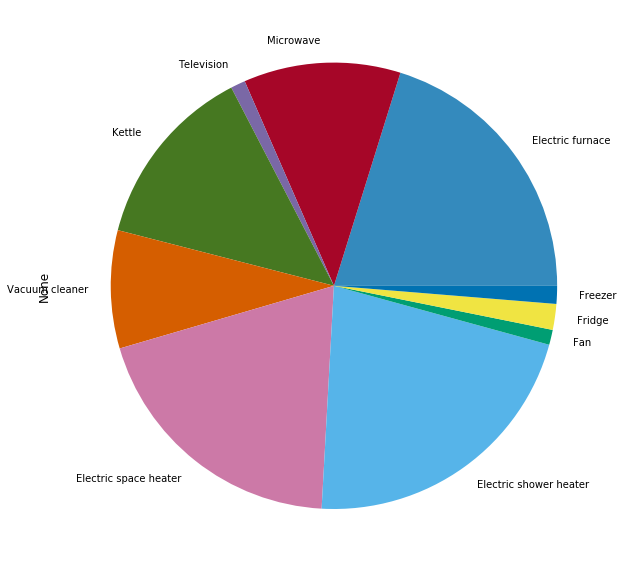

In [94]:
# Creacion de convenientes etiquetas
labels = elec.get_labels(fraction.index)
plt.figure(figsize=(10,30))
fraction.plot(kind='pie', labels=labels);

## Gráficos

### Horno

Ahora vamos a mostrar los diferentes de la potencia, tension y corriente

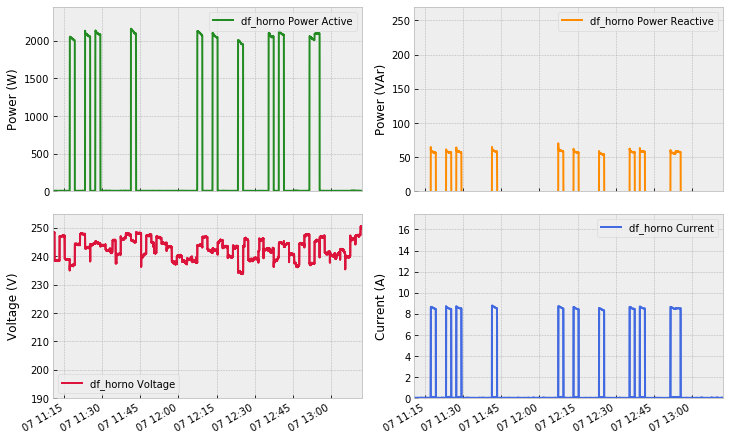

In [167]:
t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final

df_vac = next(elec[2].load())[t0:t1] #DataFrame medidor 

#graficos

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_ef['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_horno Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,2450])

df_ef['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_horno Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_ef['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_horno Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_ef['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_horno Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,17.5])


#ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))
ax1.minorticks_off()
#ax1.set_xticklabels(['09:40','11:44'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_horno.svg', bbox_inches='tight', transparent=True)
pass

Ahora vemos la grafica de una aspiradora cuyo consumo es de uno 3.5Amp y no presenta potencia reactiva apreciable

### Microondas

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 4 (Freezer)

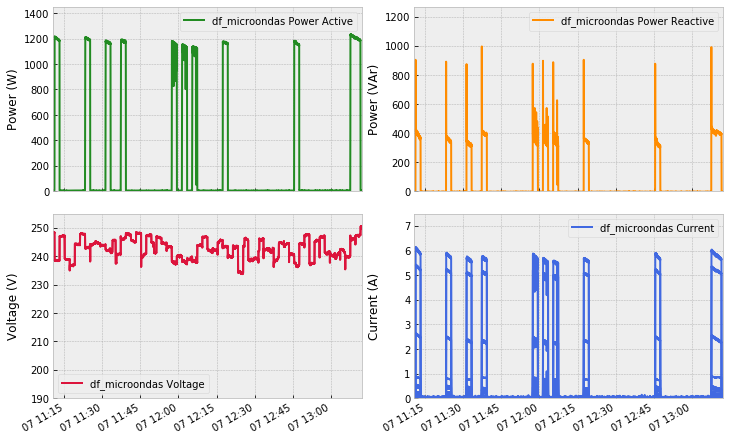

In [168]:
t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final

df_mi = next(elec[3].load())[t0:t1] #DataFrame medidor 


rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_mi['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_microondas Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_mi['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_microondas Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,1270])

df_mi['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_microondas Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_mi['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_microondas Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

#ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))
ax1.minorticks_off()
#ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_microondas.svg', bbox_inches='tight', transparent=True)
pass

### Television

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 2 (Boiler)

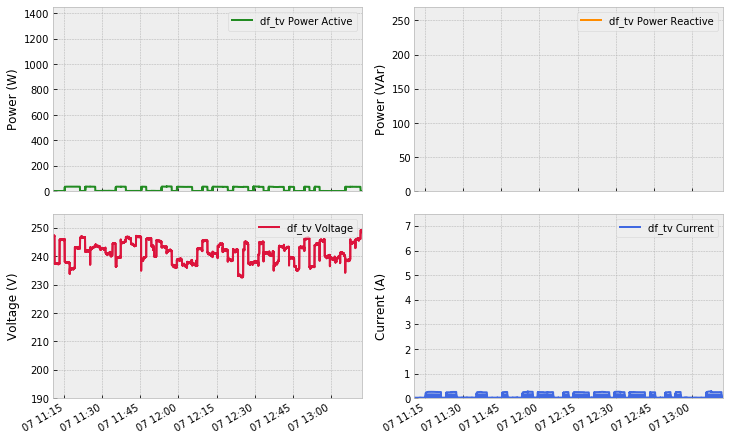

In [169]:
t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final

df_tv = next(elec[4].load())[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_tv['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_tv Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_tv['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_tv Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_tv['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_tv Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_tv['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_tv Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

#ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))

ax1.minorticks_off()
#ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_tv.svg', bbox_inches='tight', transparent=True)
pass

Como se deduce de los graficos , el hervidor esta compuesto unicamente por uan resistencia de alta potencia, motivo por el cual no presente medidas de potencia reactiva y todo sea potencia activa 

### Kettle

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 7 (Light)

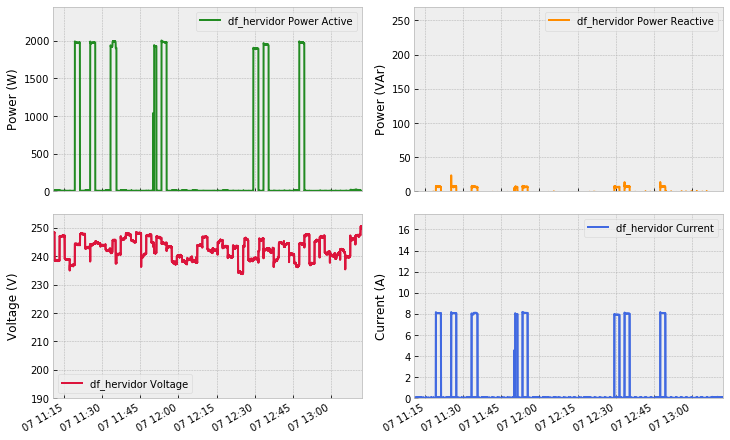

In [170]:
t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final

df_ke = next(elec[5].load())[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_ke['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_hervidor Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,2450])

df_ke['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_hervidor Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_ke['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_hervidor Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_ke['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_hervidor Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,17.5])

#ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))

ax1.minorticks_off()
#ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_hervidor.svg', bbox_inches='tight', transparent=True)
pass

Vemos el comportamiento de una luminaria de bajo consumo en la que al llevar una fuente conmutada practicamente consume el mismo nivel de potencia activa que el de reactiva. Ademas queda registrado un poequeño pico de corriente justo en el momento de encendido. 

### Aspiradora

Veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 3 (Fan)

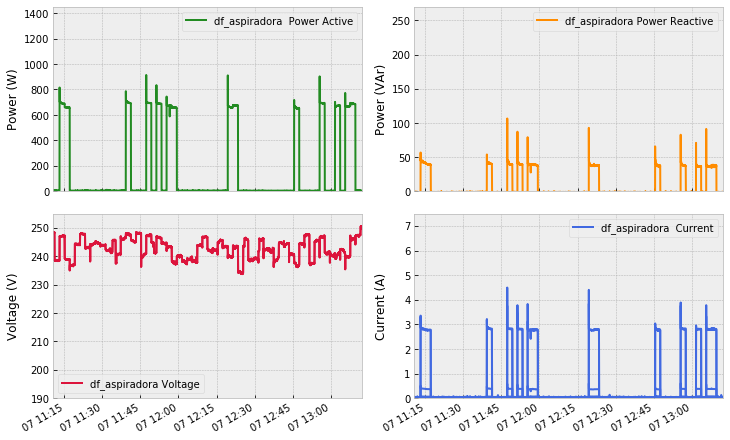

In [171]:
t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final


df_vc = next(elec[6].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_vc ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_aspiradora  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_vc ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_aspiradora Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_vc ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_aspiradora Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_vc ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_aspiradora  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


#ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))

ax1.minorticks_off()
#ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_aspiradora.svg', bbox_inches='tight', transparent=True)
pass

Vemos el comportamiento de un pequeño ventilador cuyo consumo es casi inapreciable y no presenta energia reaciva. Es llamativo el hecho de que haya fluctuaciones apreciables en la grafica de la tension asi como  tambien un pequeño pico de corriente ( este hecho solo en el momento del arranque). 

## Estufa de aceite

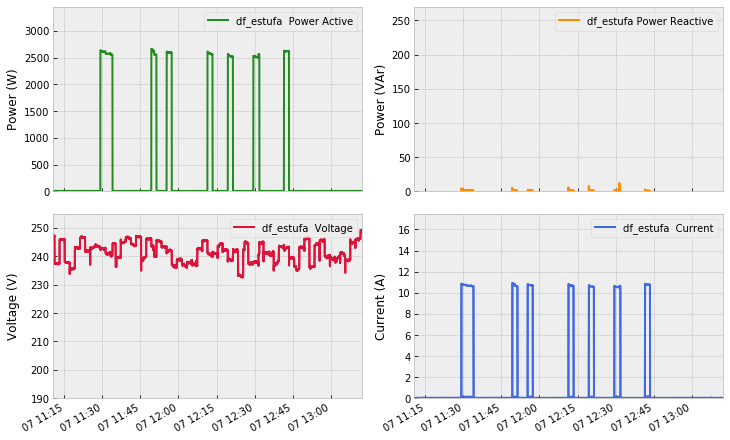

In [172]:
t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final

df_sh = next(elec[7].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_sh ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_estufa  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,3450])

df_sh ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_estufa Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_sh ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_estufa  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_sh ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_estufa  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,17.5])


#ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))

ax1.minorticks_off()
#ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_estufa.svg', bbox_inches='tight', transparent=True)
pass

### Calentador

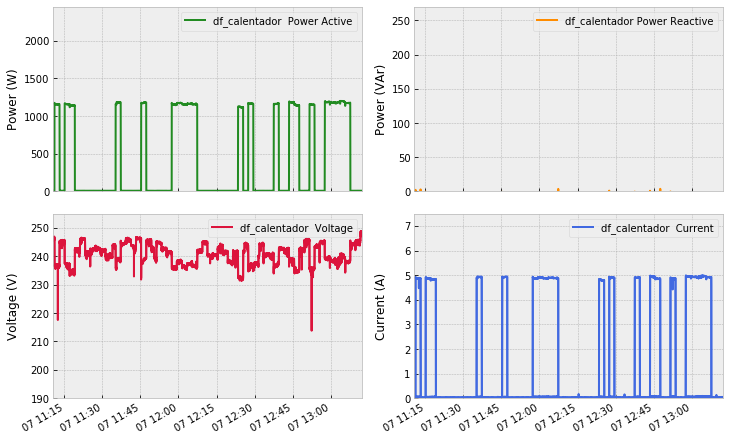

In [173]:
t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final

df_sho = next(elec[8].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_sho ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_calentador  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,2450])

df_sho ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_calentador Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_sho ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_calentador  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_sho ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_calentador  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


#ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))

ax1.minorticks_off()
#ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_calentador.svg', bbox_inches='tight', transparent=True)
pass

### Ventilador

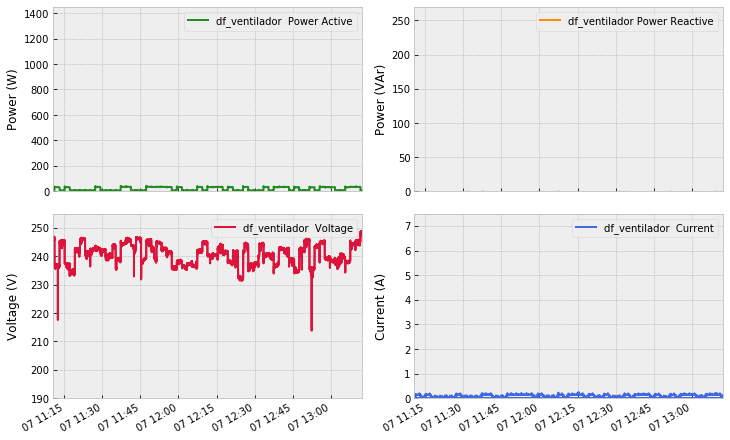

In [174]:
t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final

df_fan = next(elec[9].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_fan ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_ventilador  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_fan ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_ventilador Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_fan ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_ventilador  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_fan ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_ventilador  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


#ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))

ax1.minorticks_off()
#ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_ventilador.svg', bbox_inches='tight', transparent=True)
pass

### Nevera

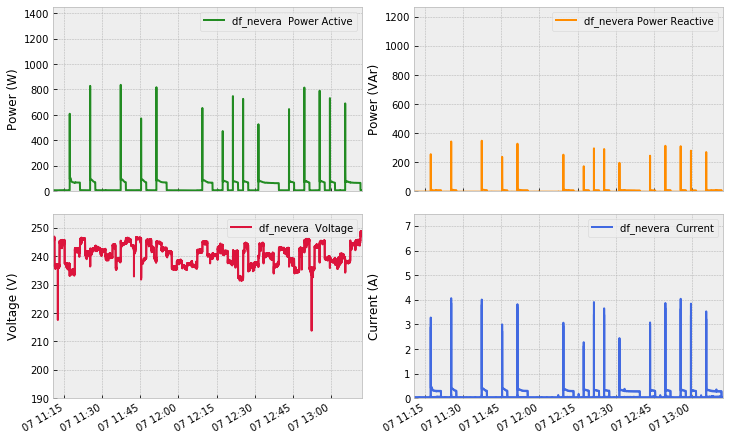

In [175]:
t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final


df_fri = next(elec[10].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_fri ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_nevera  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_fri ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_nevera Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,1270])

df_fri ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_nevera  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_fri ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_nevera  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])

#ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))

ax1.minorticks_off()
#ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_fan.svg', bbox_inches='tight', transparent=True)
pass

### Congelador

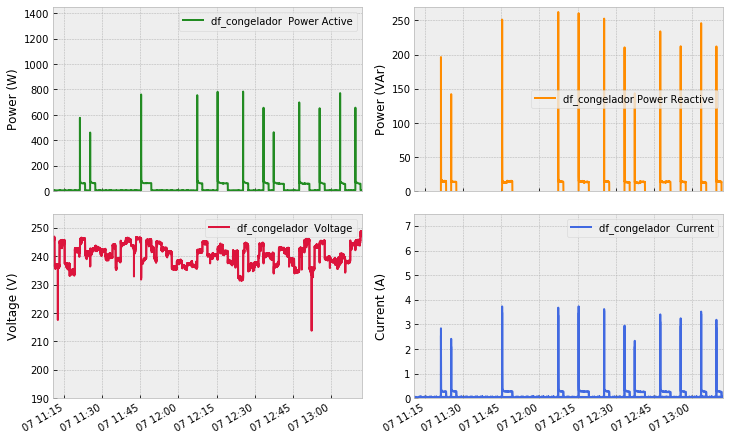

In [176]:
t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final


df_fre = next(elec[11].load())[t0:t1] #DataFrame medidor boiler

rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_fre ['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_congelador  Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,1450])

df_fre ['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_congelador Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,270])

df_fre ['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_congelador  Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_fre ['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_congelador  Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,7.5])


#ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))

ax1.minorticks_off()
#ax1.set_xticklabels(['09:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_congelador.svg', bbox_inches='tight', transparent=True)
pass

### M.Principal

Por ultimo veamos ahora en forma de grafico las potencias activa y reactiva junto a la tension y la corriente para el medidor numero 5 (TV)

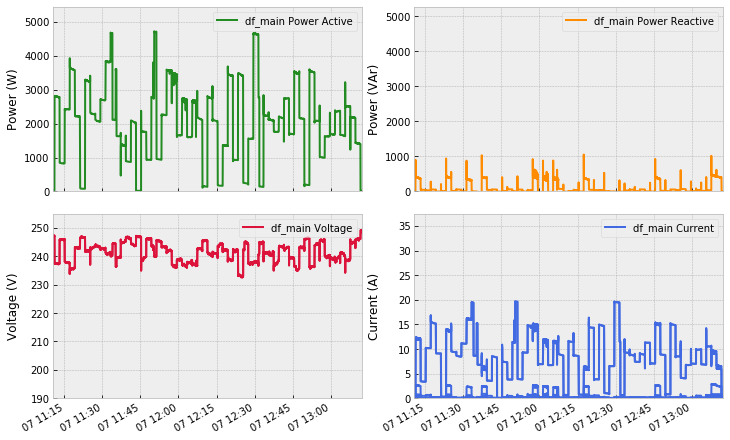

In [191]:
t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final

df_main = next(elec[1].load())[t0:t1] #DataFrame medidor boiler
rcParams['figure.figsize'] = (12, 8)
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2, sharex=True, gridspec_kw={'hspace': 0.12, 'wspace': 0.17})

df_main['power', 'active'].plot(ax=ax1,color='forestgreen')
ax1.legend(['df_main Power Active'])
ax1.set(ylabel='Power (W)')
ax1.set_ylim([0,5450])

df_main['power', 'reactive'].plot(ax=ax2,color='darkorange')
ax2.legend(['df_main Power Reactive'])
ax2.set(ylabel='Power (VAr)')
ax2.set_ylim([0,5270])

df_main['voltage'].plot(ax=ax3,color='crimson')
ax3.legend(['df_main Voltage'])
ax3.set(ylabel='Voltage (V)')
ax3.set_ylim([190,255])

df_main['current'].plot(ax=ax4,color='royalblue')
ax4.legend(['df_main Current'])
ax4.set(ylabel='Current (A)')
ax4.set_ylim([0,37.5])

#ax1.set(xlim=('2022-11-23 09:42:37+01:00','2022-11-23 11:48+01:00'))

ax1.minorticks_off()
#ax1.set_xticklabels(['9:40','11:45'])
fig.align_ylabels([(ax1,ax2,ax3,ax4)])

#guarda gráfico
plt.savefig('./data/images/df_main.svg', bbox_inches='tight', transparent=True)
pass

Por ultimo vemos la grafica de un monitor cuyos resultado arroja tanto potencia activa como reactiva  ( por la fuente conmutada) pero ninguna fluctuacion en la tension ni en en la corriente 

### Trazar los electrodomésticos cuando estén en uso

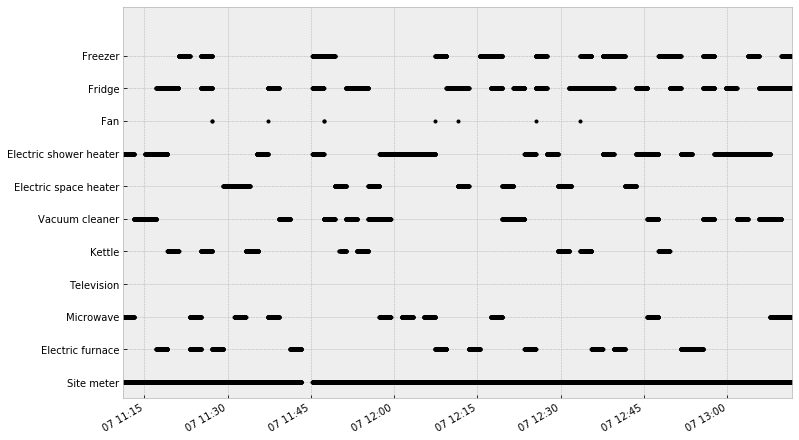

In [178]:
#sns.set_palette("Set3", n_colors=12)
# Set a threshold to remove residual power noise when devices are off
elec.plot_when_on(on_power_threshold = 40)

## Trazar datos submedidos para un solo día

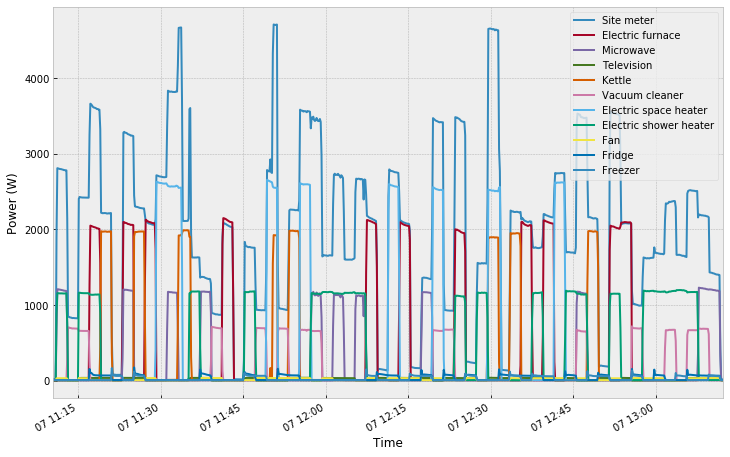

In [180]:
dsualmh.set_window(start='2023-03', end='2023-04')
elec.plot();
plt.xlabel("Time");

## Gráfico de autocorrelación

In [181]:
from pandas.plotting import autocorrelation_plot

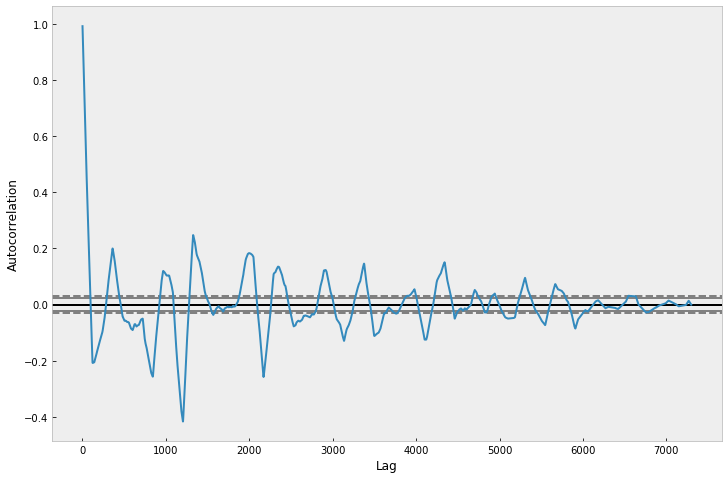

In [182]:
elec.mains().plot_autocorrelation();

## Cambio en el muestreo de datos

Al cambiar el muestro de datos, NILMTK utiliza por defecto el método mean o media aritmética el cual calculará un promedio de los valores que se encuentren de la serie de tiempo, divididos en grupos correspondientes al nuevo periodo de muestreo. Además de este método se pueden especificar otros tales como el primer dato válido (first), la mediana (median), el valor más cercano (nearest), o utilizar el valor inmediatamente posterior (ffill o pad), entre otros.

### Energia activa

Vamos ahora analizar la potencia  activa correspondiente el contador global  usando diferentes periodos de muestreo

In [183]:
m = 1 #meter
method1 = {'how': 'mean'}
method2 = {'how': 'median'}
method3 = {'how': 'first'}

#medición original, cada 1 segundo
df_1s   = next(elec[m].load(ac_type='active',sample_period=1,       resample_kwargs=method1))
#resamples
df1_10s  = next(elec[m].load(ac_type='active', sample_period=10,     resample_kwargs=method1))
df1_30s  = next(elec[m].load(ac_type='active', sample_period=30,     resample_kwargs=method1))
df1_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,   resample_kwargs=method1))
df1_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,   resample_kwargs=method1))
df1_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method1))
df1_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method1))
df1_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method1))

df2_10s  = next(elec[m].load(ac_type='active', sample_period=10,    resample_kwargs=method2))
df2_30s  = next(elec[m].load(ac_type='active', sample_period=30,    resample_kwargs=method2))
df2_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,  resample_kwargs=method2))
df2_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,  resample_kwargs=method2))
df2_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method2))
df2_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method2))
df2_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method2))

df3_10s  = next(elec[m].load(ac_type='active', sample_period=10,    resample_kwargs=method3))
df3_30s  = next(elec[m].load(ac_type='active', sample_period=30,    resample_kwargs=method3))
df3_60s  = next(elec[m].load(ac_type='active', sample_period=60*1,  resample_kwargs=method3))
df3_5m   = next(elec[m].load(ac_type='active', sample_period=60*5,  resample_kwargs=method3))
df3_10m  = next(elec[m].load(ac_type='active', sample_period=60*10,  resample_kwargs=method3))
df3_15m  = next(elec[m].load(ac_type='active', sample_period=60*15,  resample_kwargs=method3))
df3_30m  = next(elec[m].load(ac_type='active', sample_period=60*30,  resample_kwargs=method3))

#dataframe completo
dfs1=[df_1s,df1_10s,df1_30s,df1_60s,df1_5m,df1_10m,df1_15m,df1_30m]
#dataframe completo
dfs2=[df_1s,df2_10s,df2_30s,df2_60s,df2_5m,df2_10m,df2_15m,df2_30m]
#dataframe completo
dfs3=[df_1s,df3_10s,df3_30s,df3_60s,df3_5m,df3_10m,df3_15m,df3_30m]

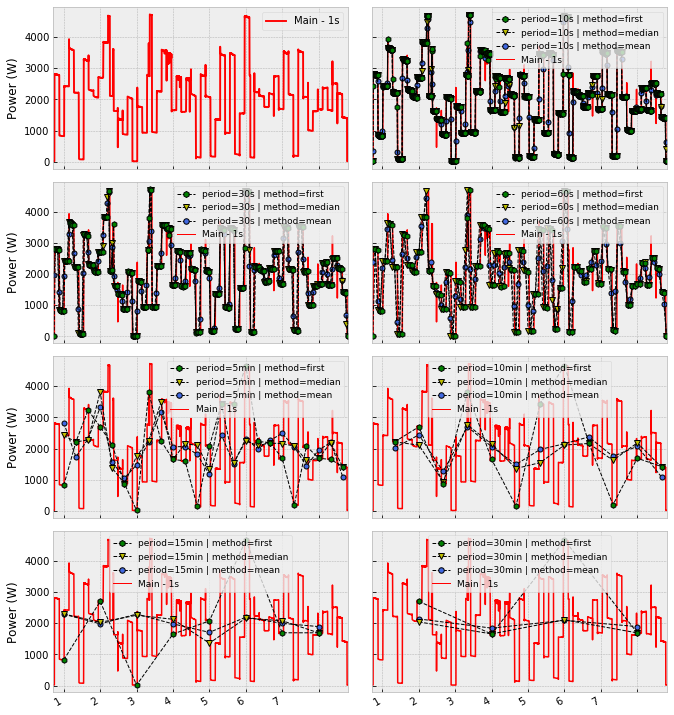

In [184]:
rcParams['figure.figsize'] = (11, 14)

t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final

labels_ = ['Main - 1s','10s','30s','60s','5min','10min','15min','30min']
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(4, 2, sharex=True, sharey=True,
                                                                   gridspec_kw={'hspace': 0.08, 'wspace': 0.08})
i = 1
for ax in fig.get_axes():   
    if ax == ax1:
        df_1s[t0:t1].plot(ax=ax,linewidth=1.9,color='r')
        ax.legend([labels_[0]])               
    else:
        import matplotlib.lines as mlines
        df_1s[t0:t1].plot(ax=ax,linewidth=1.5,color='r') 
        dfs1[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="o", markersize=5, markerfacecolor='royalblue')    
        dfs2[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="v", markersize=5.5, markerfacecolor='y')
        dfs3[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="h", markersize=5.5, markerfacecolor='g')
        #etiquetas
        line0 = mlines.Line2D([], [], lw=1, c='red', label= labels_[0])
        line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=5.5,
                              markerfacecolor='royalblue', label='period='+labels_[i]+' | method=mean')
        line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6,
                              markerfacecolor='y', label='period='+labels_[i] + ' | method=median')
        ax.legend(handles=[line2, line1, line0], fontsize=9)
        line3 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="h", markersize=6,
                              markerfacecolor='g', label='period='+labels_[i] + ' | method=first')
        ax.legend(handles=[line3, line2, line1, line0], fontsize=9)
        plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
        i = i+1
    ax.set(ylabel='Power (W)')

#ax1.set(xlim=('2022-11-23 09:42:00+01:00','2022-11-23 11:45:00+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['1','2','3','4','5','6','7'])

#guarda gráfico
plt.savefig('./data/images/2.3_Resample.svg', bbox_inches='tight', transparent=True)
pass

### Energia reactiva

Vamos ahora analizar la potencia  reactiva correspondiente el contador global  usando diferentes periodos de muestreo

In [185]:
m = 1 #meter
method1 = {'how': 'mean'}
method2 = {'how': 'median'}
method3 = {'how': 'first'}

#medición original, cada 1 segundo
df_1s   = next(elec[m].load(ac_type='reactive',sample_period=1,       resample_kwargs=method1))
#resamples
df1_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,     resample_kwargs=method1))
df1_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,     resample_kwargs=method1))
df1_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,   resample_kwargs=method1))
df1_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,   resample_kwargs=method1))
df1_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method1))
df1_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method1))
df1_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method1))

df2_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,    resample_kwargs=method2))
df2_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,    resample_kwargs=method2))
df2_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,  resample_kwargs=method2))
df2_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,  resample_kwargs=method2))
df2_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method2))
df2_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method2))
df2_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method2))

df3_10s  = next(elec[m].load(ac_type='reactive', sample_period=10,    resample_kwargs=method3))
df3_30s  = next(elec[m].load(ac_type='reactive', sample_period=30,    resample_kwargs=method3))
df3_60s  = next(elec[m].load(ac_type='reactive', sample_period=60*1,  resample_kwargs=method3))
df3_5m   = next(elec[m].load(ac_type='reactive', sample_period=60*5,  resample_kwargs=method3))
df3_10m  = next(elec[m].load(ac_type='reactive', sample_period=60*10,  resample_kwargs=method3))
df3_15m  = next(elec[m].load(ac_type='reactive', sample_period=60*15,  resample_kwargs=method3))
df3_30m  = next(elec[m].load(ac_type='reactive', sample_period=60*30,  resample_kwargs=method3))

#dataframe completo
dfs1=[df_1s,df1_10s,df1_30s,df1_60s,df1_5m,df1_10m,df1_15m,df1_30m]
#dataframe completo
dfs2=[df_1s,df2_10s,df2_30s,df2_60s,df2_5m,df2_10m,df2_15m,df2_30m]
#dataframe completo
dfs3=[df_1s,df3_10s,df3_30s,df3_60s,df3_5m,df3_10m,df3_15m,df3_30m]

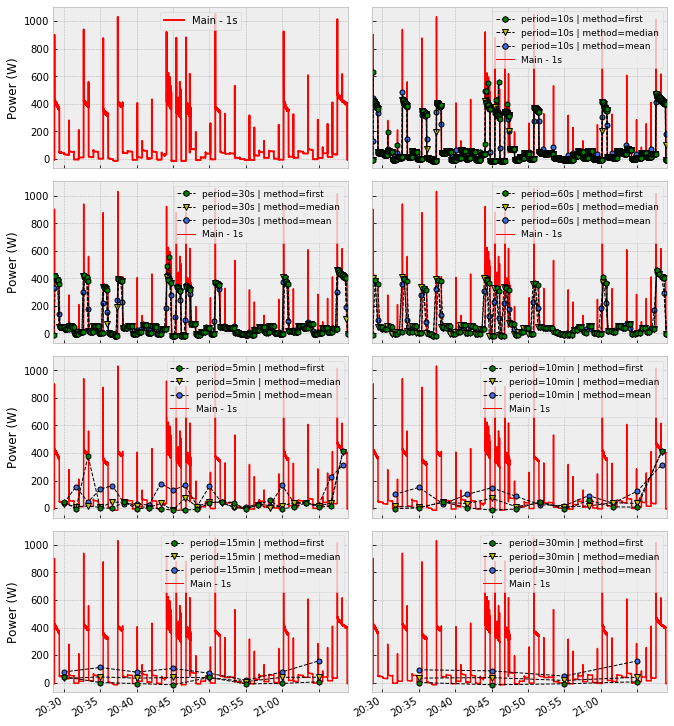

In [186]:
rcParams['figure.figsize'] = (11, 14)

t0 = '2023-03-07 11:10:38+01:00' #tiempo inicial
t1 = '2023-03-07 13:12:15+01:00' #tiempo final

labels_ = ['Main - 1s','10s','30s','60s','5min','10min','15min','30min']
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7, ax8)) = plt.subplots(4, 2, sharex=True, sharey=True,
                                                                   gridspec_kw={'hspace': 0.08, 'wspace': 0.08})
i = 1
for ax in fig.get_axes():   
    if ax == ax1:
        df_1s[t0:t1].plot(ax=ax,linewidth=1.9,color='r')
        ax.legend([labels_[0]])               
    else:
        import matplotlib.lines as mlines
        df_1s[t0:t1].plot(ax=ax,linewidth=1.5,color='r') 
        dfs1[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="o", markersize=5, markerfacecolor='royalblue')    
        dfs2[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="v", markersize=5.5, markerfacecolor='y')
        dfs3[i][t0:t1].plot(ax=ax,lw=1, c='k', ls='--', marker="h", markersize=5.5, markerfacecolor='g')
        #etiquetas
        line0 = mlines.Line2D([], [], lw=1, c='red', label= labels_[0])
        line1 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="o", markersize=5.5,
                              markerfacecolor='royalblue', label='period='+labels_[i]+' | method=mean')
        line2 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="v", markersize=6,
                              markerfacecolor='y', label='period='+labels_[i] + ' | method=median')
        ax.legend(handles=[line2, line1, line0], fontsize=9)
        line3 = mlines.Line2D([], [], lw=1, c='k', ls='--', marker="h", markersize=6,
                              markerfacecolor='g', label='period='+labels_[i] + ' | method=first')
        ax.legend(handles=[line3, line2, line1, line0], fontsize=9)
        plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
        i = i+1
    ax.set(ylabel='Power (W)')

    
#ax1.set(xlim=('2022-11-23 09:42:00+01:00','2022-11-23 11:45:00+01:00'))
#ax1.set(xlim=('2021-11-10 18:00:00+01:00','2021-11-12 18:05:00+01:00'))
ax1.minorticks_off()
ax1.set_xticklabels(['20:30','20:35','20:40','20:45','20:50','20:55','21:00'])

#guarda gráfico
plt.savefig('./data/images/2.4_Resample.svg', bbox_inches='tight', transparent=True)
pass